# Group 24 Guilds Project
Made by: 
- Stefano Roscilli Zaffiri
- Sabrina Mammino 
- Elvira Francesca Tuccillo 

### PROJECT GUIDELINE
1) Perform an Explanatory data analysis (EDA) with visualization.
2) Dataset preprocessing
3) Training and Test set Generation
4) Problem Type Identification, MOdel Selection + Testing and hyperparameters tuning
5) Performance Test
6) Models COmparison


## EDA and Dataset Preprocessing
In order to handle the first stages of our project we decided to use the OSEMNN Pipeline:
* O (Obtaining our data)
* S (Scrubbing)
* E (EDA - Explorative Data Analysis or Exploring -> Data/trend visualization)
* M (Data Modeling)
* N (Interpreting our data)

### Main libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

### 1. **Obtain**
This is the first step, where we collect the data needed for our analysis from the main database.

### Database Access and Snapshot

In [3]:
guilds_df = pd.read_csv("guilds.csv")   # Dataset Loading
guilds_df.sample(10)                    # printing of 10 random rows of the dataframe

,Fae_Dust_Reserve,Physical_Stamina,Mystical_Index,Healer_consultation_Presence,Elixir_veggies_consumption_Presence,Mystic_Energy_Level,Bolt_of_doom_Presence,Age_of_Wisdom,High_willingness_Presence,Defense_spell_difficulty_Presence,...,Royal_family_pressure_Presence,Dragon_Sight_Sharpness,Guild_Membership,Enchanted_Coin_Count,Celestial_Alignment,Knightly_Valor,Heavy_elixir_consumption_Presence,Stigmata_of_the_cursed_Presence,Dragon_status_Presence,Rune_Power
23907,17.119140,0.0,22.0,Present,Present,1.661256,Absent,6.0,Present,Absent,...,Present,2.0,No_Guild,74.0,7.514636,3.0,Absent,Absent,Absent,80.858215
54739,7.419726,21.0,21.0,Present,NaN,0.800784,Absent,NaN,Absent,Absent,...,Absent,6.0,No_Guild,220.0,6.348916,4.0,Absent,Absent,Absent,NaN
5884,12.848917,NaN,38.0,Present,NaN,2.507342,Absent,8.0,Absent,Absent,...,Present,4.0,No_Guild,116.0,7.362417,7.0,Absent,Absent,Absent,22.336485
30430,6.748582,0.0,24.0,Present,Present,0.527709,NaN,13.0,Present,Absent,...,Present,NaN,No_Guild,438.0,5.966672,5.0,NaN,NaN,Present,33.351377
212008,28.139722,0.0,NaN,Present,NaN,0.286531,Absent,9.0,Absent,Absent,...,Present,5.0,No_Guild,344.0,4.982149,4.0,Absent,Absent,Absent,79.136605
17155,2.460223,0.0,28.0,NaN,Present,2.117793,Absent,12.0,Present,Absent,...,Present,1.0,No_Guild,245.0,5.649612,4.0,NaN,Absent,Present,34.117276
152972,1.635877,0.0,31.0,Present,Present,0.918978,NaN,10.0,Absent,Absent,...,Absent,5.0,No_Guild,423.0,9.195237,NaN,Absent,Absent,Present,33.189252
43786,22.215394,30.0,19.0,Present,Present,2.220774,Absent,3.0,Absent,Present,...,Absent,6.0,NaN,68.0,5.112357,6.0,Absent,Absent,NaN,7.214438
163582,11.160918,0.0,NaN,Present,Present,0.190087,Absent,3.0,Absent,Absent,...,NaN,5.0,No_Guild,212.0,2.165530,8.0,NaN,Absent,Absent,NaN
118549,6.677195,0.0,23.0,Present,Present,0.522706,Absent,4.0,Absent,Absent,...,Absent,6.0,No_Guild,90.0,7.416005,NaN,Absent,Absent,Present,NaN


## 2/3. **Scrub**/**EDA**
This is the second step, where we focuses on cleaning the data to make it usable for analysis. Our aims are:
- Understanding our Database structure
- Handling missing values

### Main info analysis

In [4]:
guilds_df.info(verbose=True)    ## gives information about the data types,columns, null value counts, memory usage etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Fae_Dust_Reserve                     228327 non-null  float64
 1   Physical_Stamina                     228269 non-null  float64
 2   Mystical_Index                       228480 non-null  float64
 3   Healer_consultation_Presence         228348 non-null  object 
 4   Elixir_veggies_consumption_Presence  228110 non-null  object 
 5   Mystic_Energy_Level                  228177 non-null  float64
 6   Bolt_of_doom_Presence                228146 non-null  object 
 7   Age_of_Wisdom                        228309 non-null  float64
 8   High_willingness_Presence            228370 non-null  object 
 9   Defense_spell_difficulty_Presence    228385 non-null  object 
 10  Doc_availability_challenge_Presence  228233 non-null  object 
 11  Mental_Wizard

In [5]:
guilds_df.describe()    # descriptive statistics generation

,Fae_Dust_Reserve,Physical_Stamina,Mystical_Index,Mystic_Energy_Level,Age_of_Wisdom,Mental_Wizardry,Potion_Power_Level,Gold_Pouches_Per_Year,Wizardry_Skill,Spell_Mastering_Days,Level_of_Academic_Wisdom,General_Health_Condition,Dragon_Sight_Sharpness,Enchanted_Coin_Count,Celestial_Alignment,Knightly_Valor,Rune_Power
count,228327.000000,228269.000000,228480.000000,228177.000000,228309.000000,228266.000000,228241.000000,228367.000000,228414.000000,228476.000000,228120.000000,228111.000000,228141.000000,228149.000000,228007.000000,228178.000000,228414.000000
mean,9.011950,4.237833,28.384703,0.999796,8.035978,3.183326,50.058044,6.057040,49.948452,3.996350,5.050123,2.511273,5.002218,249.518118,5.330323,4.994969,28.519541
std,6.135197,8.718006,6.615276,0.997866,3.052688,7.406399,28.858348,2.070317,15.014295,2.829260,0.985930,1.067748,2.232844,144.269471,1.841398,1.581795,15.941950
min,0.000771,0.000000,12.000000,0.000011,1.000000,0.000000,0.001273,1.000000,-12.515839,0.001112,1.000000,1.000000,0.000000,0.000000,1.011919,0.000000,0.025153
25%,4.329324,0.000000,24.000000,0.286304,6.000000,0.000000,24.977367,5.000000,39.831133,1.913701,4.000000,2.000000,3.000000,125.000000,3.994796,4.000000,16.074807
50%,7.812104,0.000000,27.000000,0.694514,8.000000,0.000000,50.127937,7.000000,49.966800,3.351681,5.000000,2.000000,5.000000,249.000000,5.259830,5.000000,26.396689
75%,12.426241,3.000000,31.000000,1.390092,10.000000,2.000000,75.011510,8.000000,60.060113,5.380260,6.000000,3.000000,6.000000,375.000000,6.638099,6.000000,38.885087
max,50.809638,30.000000,98.000000,13.096465,13.000000,30.000000,99.999895,8.000000,115.245552,31.692387,6.000000,5.000000,18.000000,499.000000,9.988370,10.000000,94.868193


In [6]:
guilds_df.shape

(253680, 31)

### Plot data distribution
Before filling all these Nan Values we decided to study our data distribution for various reasons:
- Right Imputation Method Choice
- Bias Avoidance
- Outliers identification


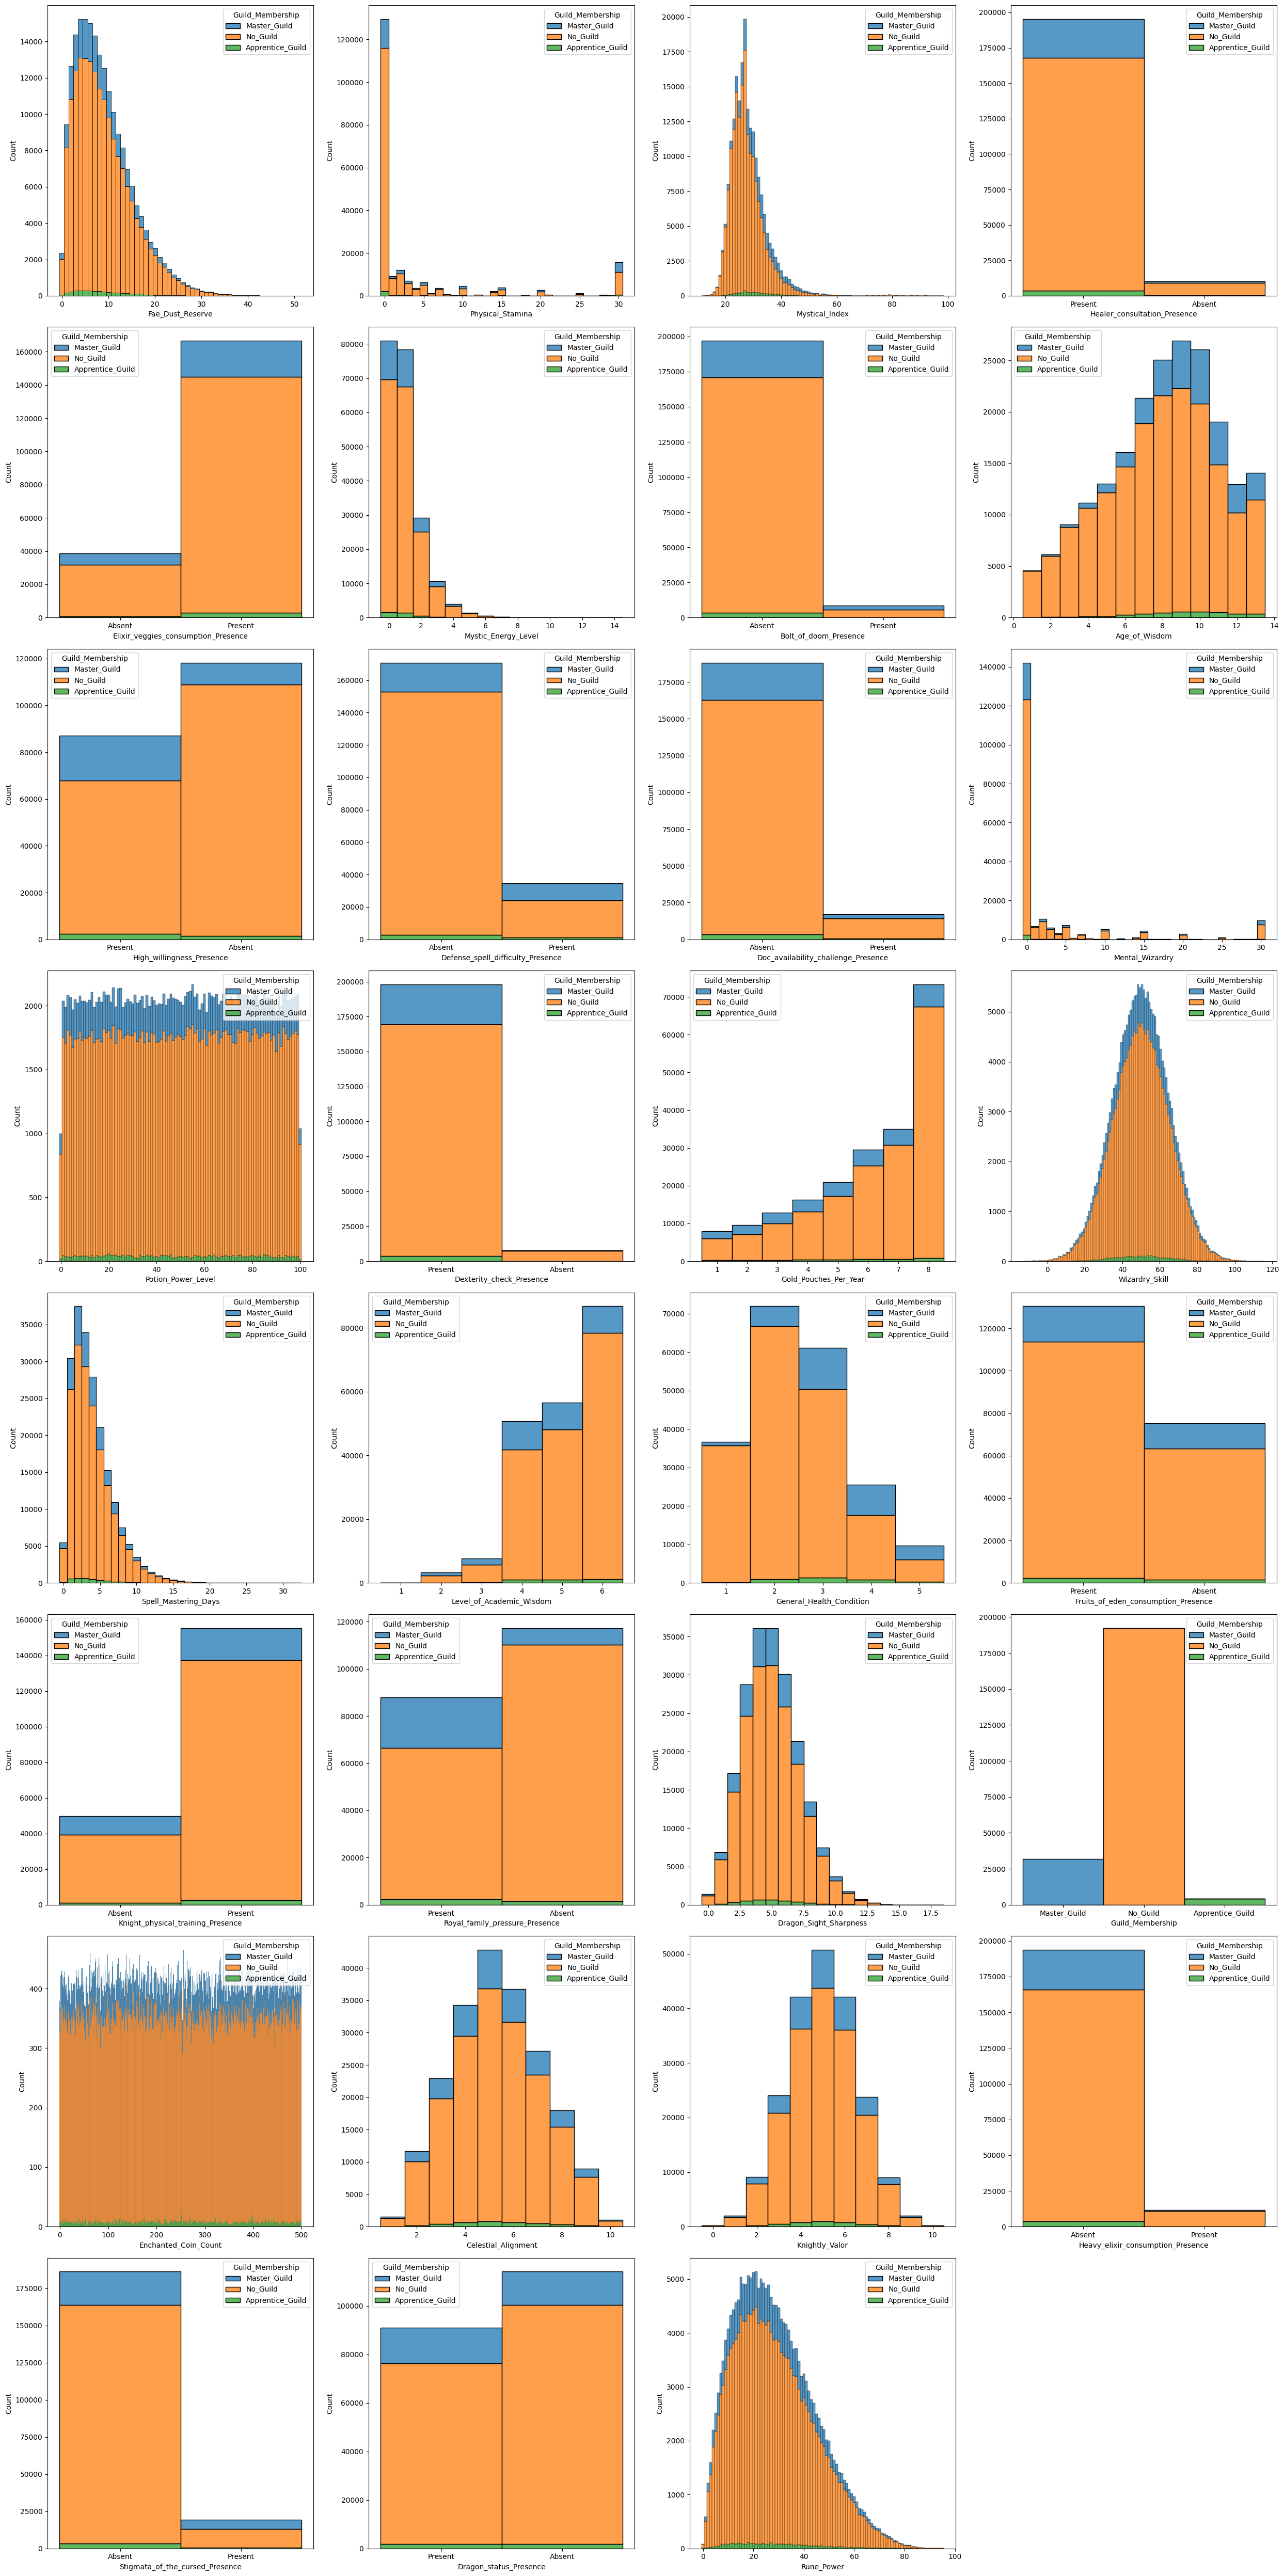

In [7]:
columns = guilds_df.columns  
fig, axes = plt.subplots(8, 4, figsize=(25, 50))  
axes = axes.flatten()  


for ax, column in zip(axes, columns):
    sns.histplot(guilds_df, x=column, hue='Guild_Membership', multiple='stack', discrete=True,ax=ax)
      


# Deactivate unused plots 
for i in range(len(columns), len(axes)):
    axes[i].set_visible(False)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()


### Missing values check


Missing Values Summary:
Fae_Dust_Reserve                       25353
Physical_Stamina                       25411
Mystical_Index                         25200
Healer_consultation_Presence           25332
Elixir_veggies_consumption_Presence    25570
Mystic_Energy_Level                    25503
Bolt_of_doom_Presence                  25534
Age_of_Wisdom                          25371
High_willingness_Presence              25310
Defense_spell_difficulty_Presence      25295
Doc_availability_challenge_Presence    25447
Mental_Wizardry                        25414
Potion_Power_Level                     25439
Dexterity_check_Presence               25043
Gold_Pouches_Per_Year                  25313
Wizardry_Skill                         25266
Spell_Mastering_Days                   25204
Level_of_Academic_Wisdom               25560
General_Health_Condition               25569
Fruits_of_eden_consumption_Presence    25229
Knight_physical_training_Presence      25459
Royal_family_pressure_Presence 

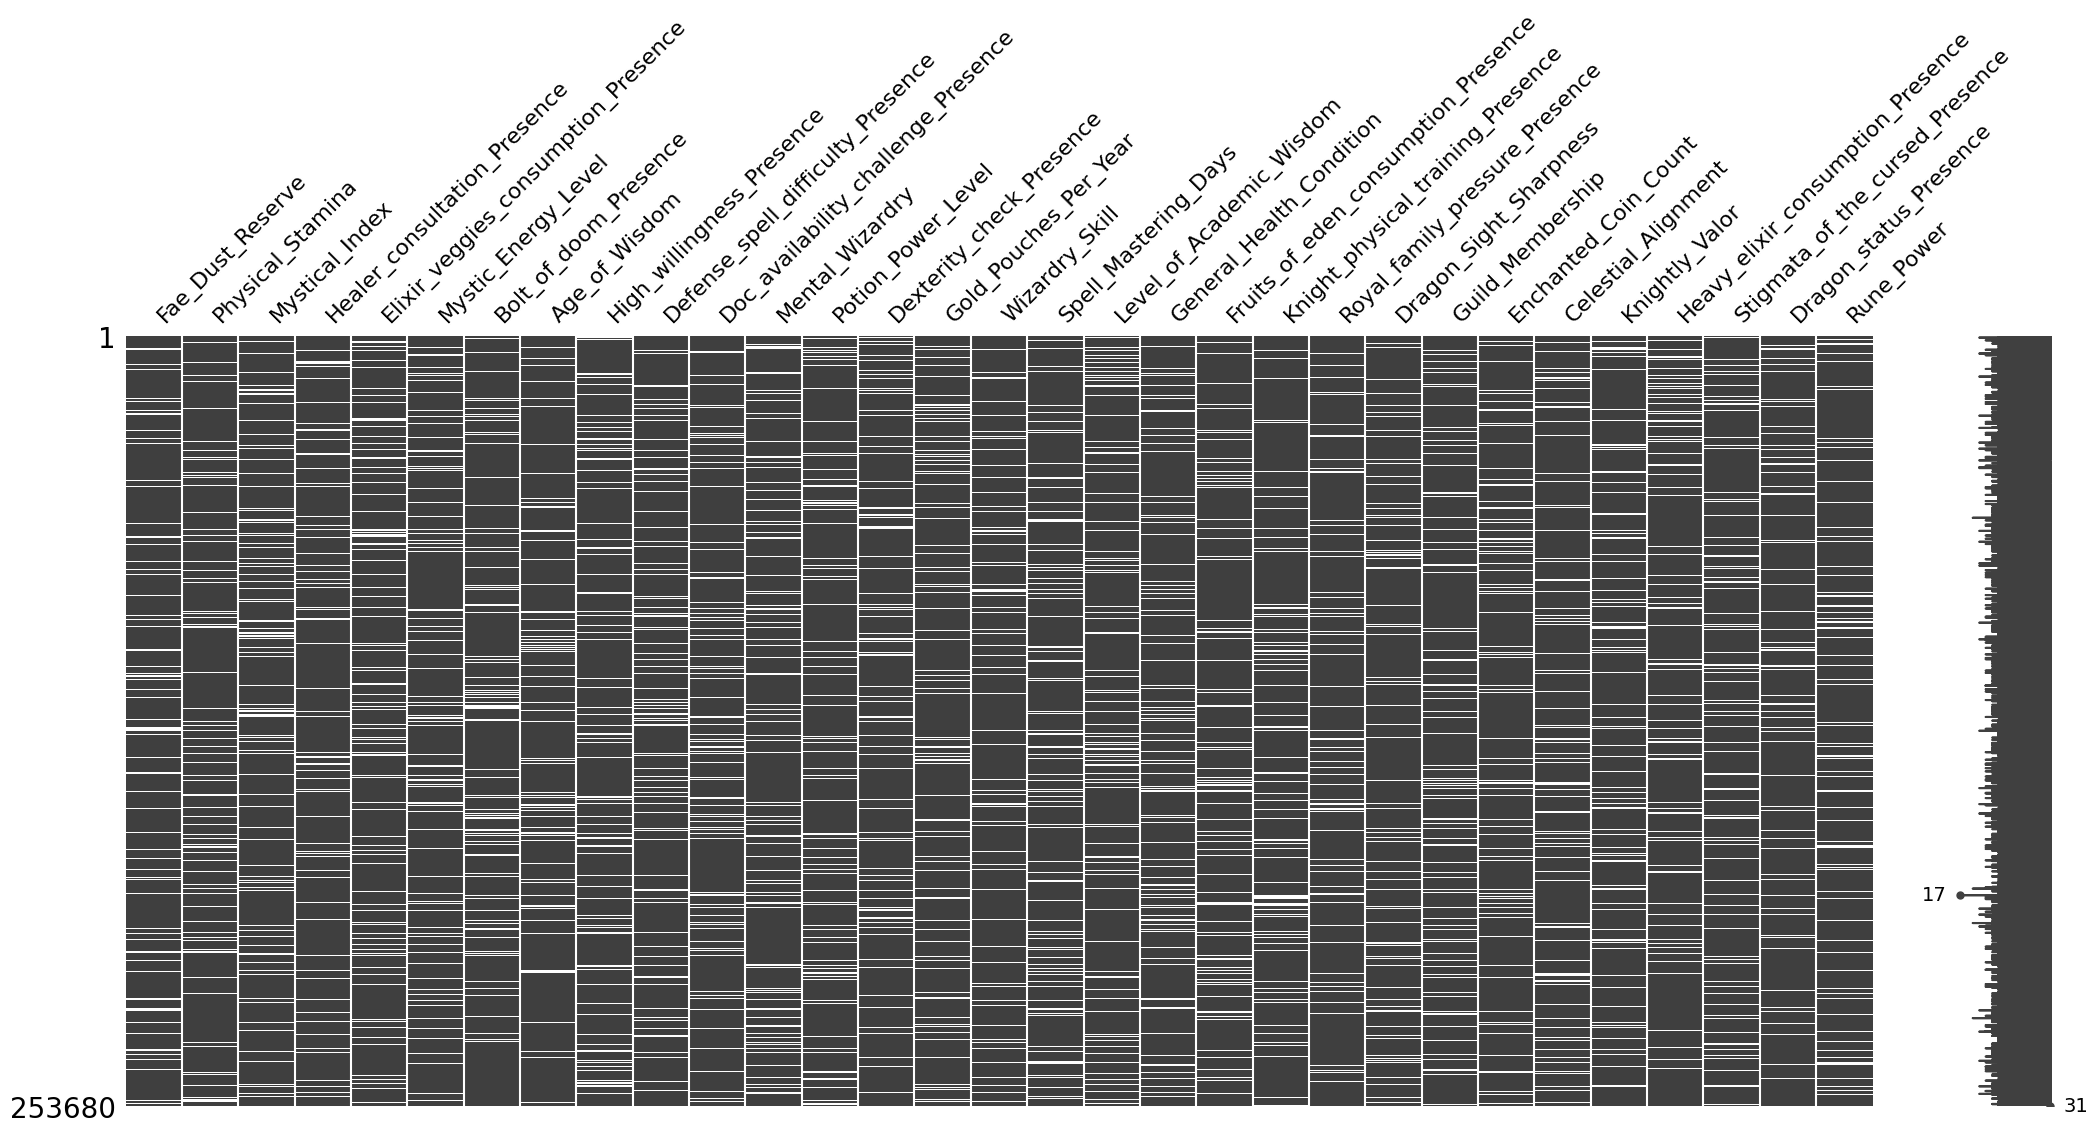

In [8]:
# Check for missing values
missing_values = guilds_df.isnull().sum()
# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)
guilds_df_copy = guilds_df.copy(deep= True)
import missingno as msno
p = msno.matrix(guilds_df_copy)

From this graph we can notice how we are working with an enormous dataset (31 column and 253.680 rows), so one of our goal will be to reduce our dataset by dropping down columns that:
- have a Nan value in our target attribute
- doesn't have a high correlation value with our target attribute

### Missing values percentage check

In [9]:
missing_percent = guilds_df.isnull().sum() / len(guilds_df) * 100
print(missing_percent.sort_values(ascending=False))

Celestial_Alignment                    10.120230
Dragon_status_Presence                 10.115500
Elixir_veggies_consumption_Presence    10.079628
General_Health_Condition               10.079234
Level_of_Academic_Wisdom               10.075686
Dragon_Sight_Sharpness                 10.067408
Bolt_of_doom_Presence                  10.065437
Enchanted_Coin_Count                   10.064254
Royal_family_pressure_Presence         10.054005
Mystic_Energy_Level                    10.053217
Knightly_Valor                         10.052822
Knight_physical_training_Presence      10.035872
Doc_availability_challenge_Presence    10.031142
Guild_Membership                       10.031142
Potion_Power_Level                     10.027988
Mental_Wizardry                        10.018133
Physical_Stamina                       10.016950
Heavy_elixir_consumption_Presence      10.016556
Age_of_Wisdom                          10.001183
Fae_Dust_Reserve                        9.994087
Healer_consultation_

### Here we drop the rows where Guild_Membership is null

In [10]:
# Check how many rows have missing values in 'Guild_Membership' before removing them
missing_guild_membership = guilds_df['Guild_Membership'].isnull().sum()
print(f"Numero di righe con 'Guild_Membership' mancante: {missing_guild_membership}")

# Drop rows that have 'NaN' in 'Guild_Membership'
guilds_df = guilds_df.dropna(subset=['Guild_Membership'])

# verify rows have been correctly removed
print(f"Numero di righe dopo aver droppato: {len(guilds_df)}")


Numero di righe con 'Guild_Membership' mancante: 25447
Numero di righe dopo aver droppato: 228233


In [11]:
guilds_df.shape

(228233, 31)

### Check for rows where Guild_Membership = No_Guild or Guild_Membership = Master_Guild that have respectively more than 4 and more than 5 missing values in a single row so that we can drop them and rebalance the dataset a bit

In [12]:
guild_counts = guilds_df['Guild_Membership'].value_counts()

# Count specific No_Guild, Master_Guild, Apprentice_Guild rows 
specific_counts = guild_counts.loc[['No_Guild', 'Master_Guild', 'Apprentice_Guild']]

print(specific_counts)

Guild_Membership
No_Guild            192328
Master_Guild         31739
Apprentice_Guild      4166
Name: count, dtype: int64


In [13]:
guilds_df['missing_values_in_row'] = guilds_df.isnull().sum(axis=1)

# Count rows that meet requirements
no_guild_count_3 = guilds_df[
    (guilds_df['Guild_Membership'] == 'No_Guild') & 
    (guilds_df['missing_values_in_row'] >= 3)
].shape[0]

no_guild_count_4 = guilds_df[
    (guilds_df['Guild_Membership'] == 'No_Guild') & 
    (guilds_df['missing_values_in_row'] >= 4)
].shape[0]

no_guild_count_5 = guilds_df[
    (guilds_df['Guild_Membership'] == 'No_Guild') & 
    (guilds_df['missing_values_in_row'] >= 5)
].shape[0]

master_guild_count_4 = guilds_df[
    (guilds_df['Guild_Membership'] == 'Master_Guild') & 
    (guilds_df['missing_values_in_row'] >= 4)
].shape[0]

master_guild_count_5 = guilds_df[
    (guilds_df['Guild_Membership'] == 'Master_Guild') & 
    (guilds_df['missing_values_in_row'] >= 5)
].shape[0]

master_guild_count_6 = guilds_df[
    (guilds_df['Guild_Membership'] == 'Master_Guild') & 
    (guilds_df['missing_values_in_row'] >= 6)
].shape[0]

print(f"Rows with 'Guild_Membership = no_guild' and 'missing_values_in_row >= 3': {no_guild_count_3}")
print(f"Rows with 'Guild_Membership = no_guild' and 'missing_values_in_row >= 4': {no_guild_count_4}")
print(f"Rows with 'Guild_Membership = no_guild' and 'missing_values_in_row >= 5': {no_guild_count_5}")

print(f"Rows with 'Guild_Membership = master_guild' and 'missing_values_in_row >= 4': {master_guild_count_4}")
print(f"Rows with 'Guild_Membership = master_guild' and 'missing_values_in_row >= 5': {master_guild_count_5}")
print(f"Rows with 'Guild_Membership = master_guild' and 'missing_values_in_row >= 6': {master_guild_count_6}")



Rows with 'Guild_Membership = no_guild' and 'missing_values_in_row >= 3': 113650
Rows with 'Guild_Membership = no_guild' and 'missing_values_in_row >= 4': 67993
Rows with 'Guild_Membership = no_guild' and 'missing_values_in_row >= 5': 33949
Rows with 'Guild_Membership = master_guild' and 'missing_values_in_row >= 4': 11412
Rows with 'Guild_Membership = master_guild' and 'missing_values_in_row >= 5': 5587
Rows with 'Guild_Membership = master_guild' and 'missing_values_in_row >= 6': 2280


 We decide to remove rows with `Guild_Membership = No_Guild` and `missing values in that rows >= 3` because we want to be really strict since this colums has the vast majority of observations causing it to be the main reason for our unbalancing.
 
 Instead for rows with `Guild_Membership = Master_Guild / missing_values>= 5` because if we take 4 they would be too much or with 6 there is a really low number

In [14]:
# Creation of a column to count the number of missin values
guilds_df['missing_values_in_row'] = guilds_df.isnull().sum(axis=1)

# Filter and drop columns that meet parameters 
guilds_df = guilds_df[~(
    (guilds_df['Guild_Membership'] == 'No_Guild') & (guilds_df['missing_values_in_row'] >= 3) |
    (guilds_df['Guild_Membership'] == 'Master_Guild') & (guilds_df['missing_values_in_row'] >= 5)
)]

guilds_df = guilds_df.drop(columns=['missing_values_in_row'])

In [15]:
guilds_df.shape

(108996, 31)

## Data Preparation for KNN (Missing Values Filling) / Preprocessing
Considering the important presence of missing data we decided to use KNN that is optimal for:
- Preserving Patterns and Relationship: Knn considers the relationship beetweeen features;
- Flexibility Across Data types: it can work with both numerical and categorical attribute;


However considering how much influenced it can be by outliers we will do:
1) CATEGORICAL ENCODING: in order to run KNN
2) OUTLIERS IDENTIFICATION AND ELIMINATION
3) CORRELATION COMPUTATION: we look for low correlations with our target attribute for dropping more column
4) CREATE A SMALLER DATABASE: that will allow us to  work with more easiness
5) KNN INPUTER.

### Categorical Attribute encoding
In order to use KNN for the missing value we first need to encode categorical attributes. However, when using Label encoding we noticed how this last one had the tendency of filling them. So we temporarly substitute NaN value with "missing" values just for the encoding process.

In [16]:
from sklearn.preprocessing import LabelEncoder

df_encoded = guilds_df.copy()

# Setup label encoder 
label_encoder = LabelEncoder()
categorical_columns = df_encoded.select_dtypes(include='object').columns

for col in categorical_columns:
    if col == 'Guild_Membership':  
        # Mapping for Guild_Membership 
        df_encoded[col] = df_encoded[col].map({
            'No_Guild': 0, 
            'Master_Guild': 1, 
            'Apprentice_Guild': 2
        }).astype(int)  
    else:
        # temmporarly substitue NaN values with "missing"
        df_encoded[col] = df_encoded[col].fillna("missing")
        
        # Apply Label Encoder 
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
        
        # Reset NaN values 
        df_encoded[col] = df_encoded[col].replace(
            label_encoder.transform(["missing"])[0], 
            np.nan
        )


### Boxplot Creation - Outliers Analysis
Usefull for understanding the distribution of Outliers. 
We use only numerical columns since we do not have outliers for binary categorical columns.

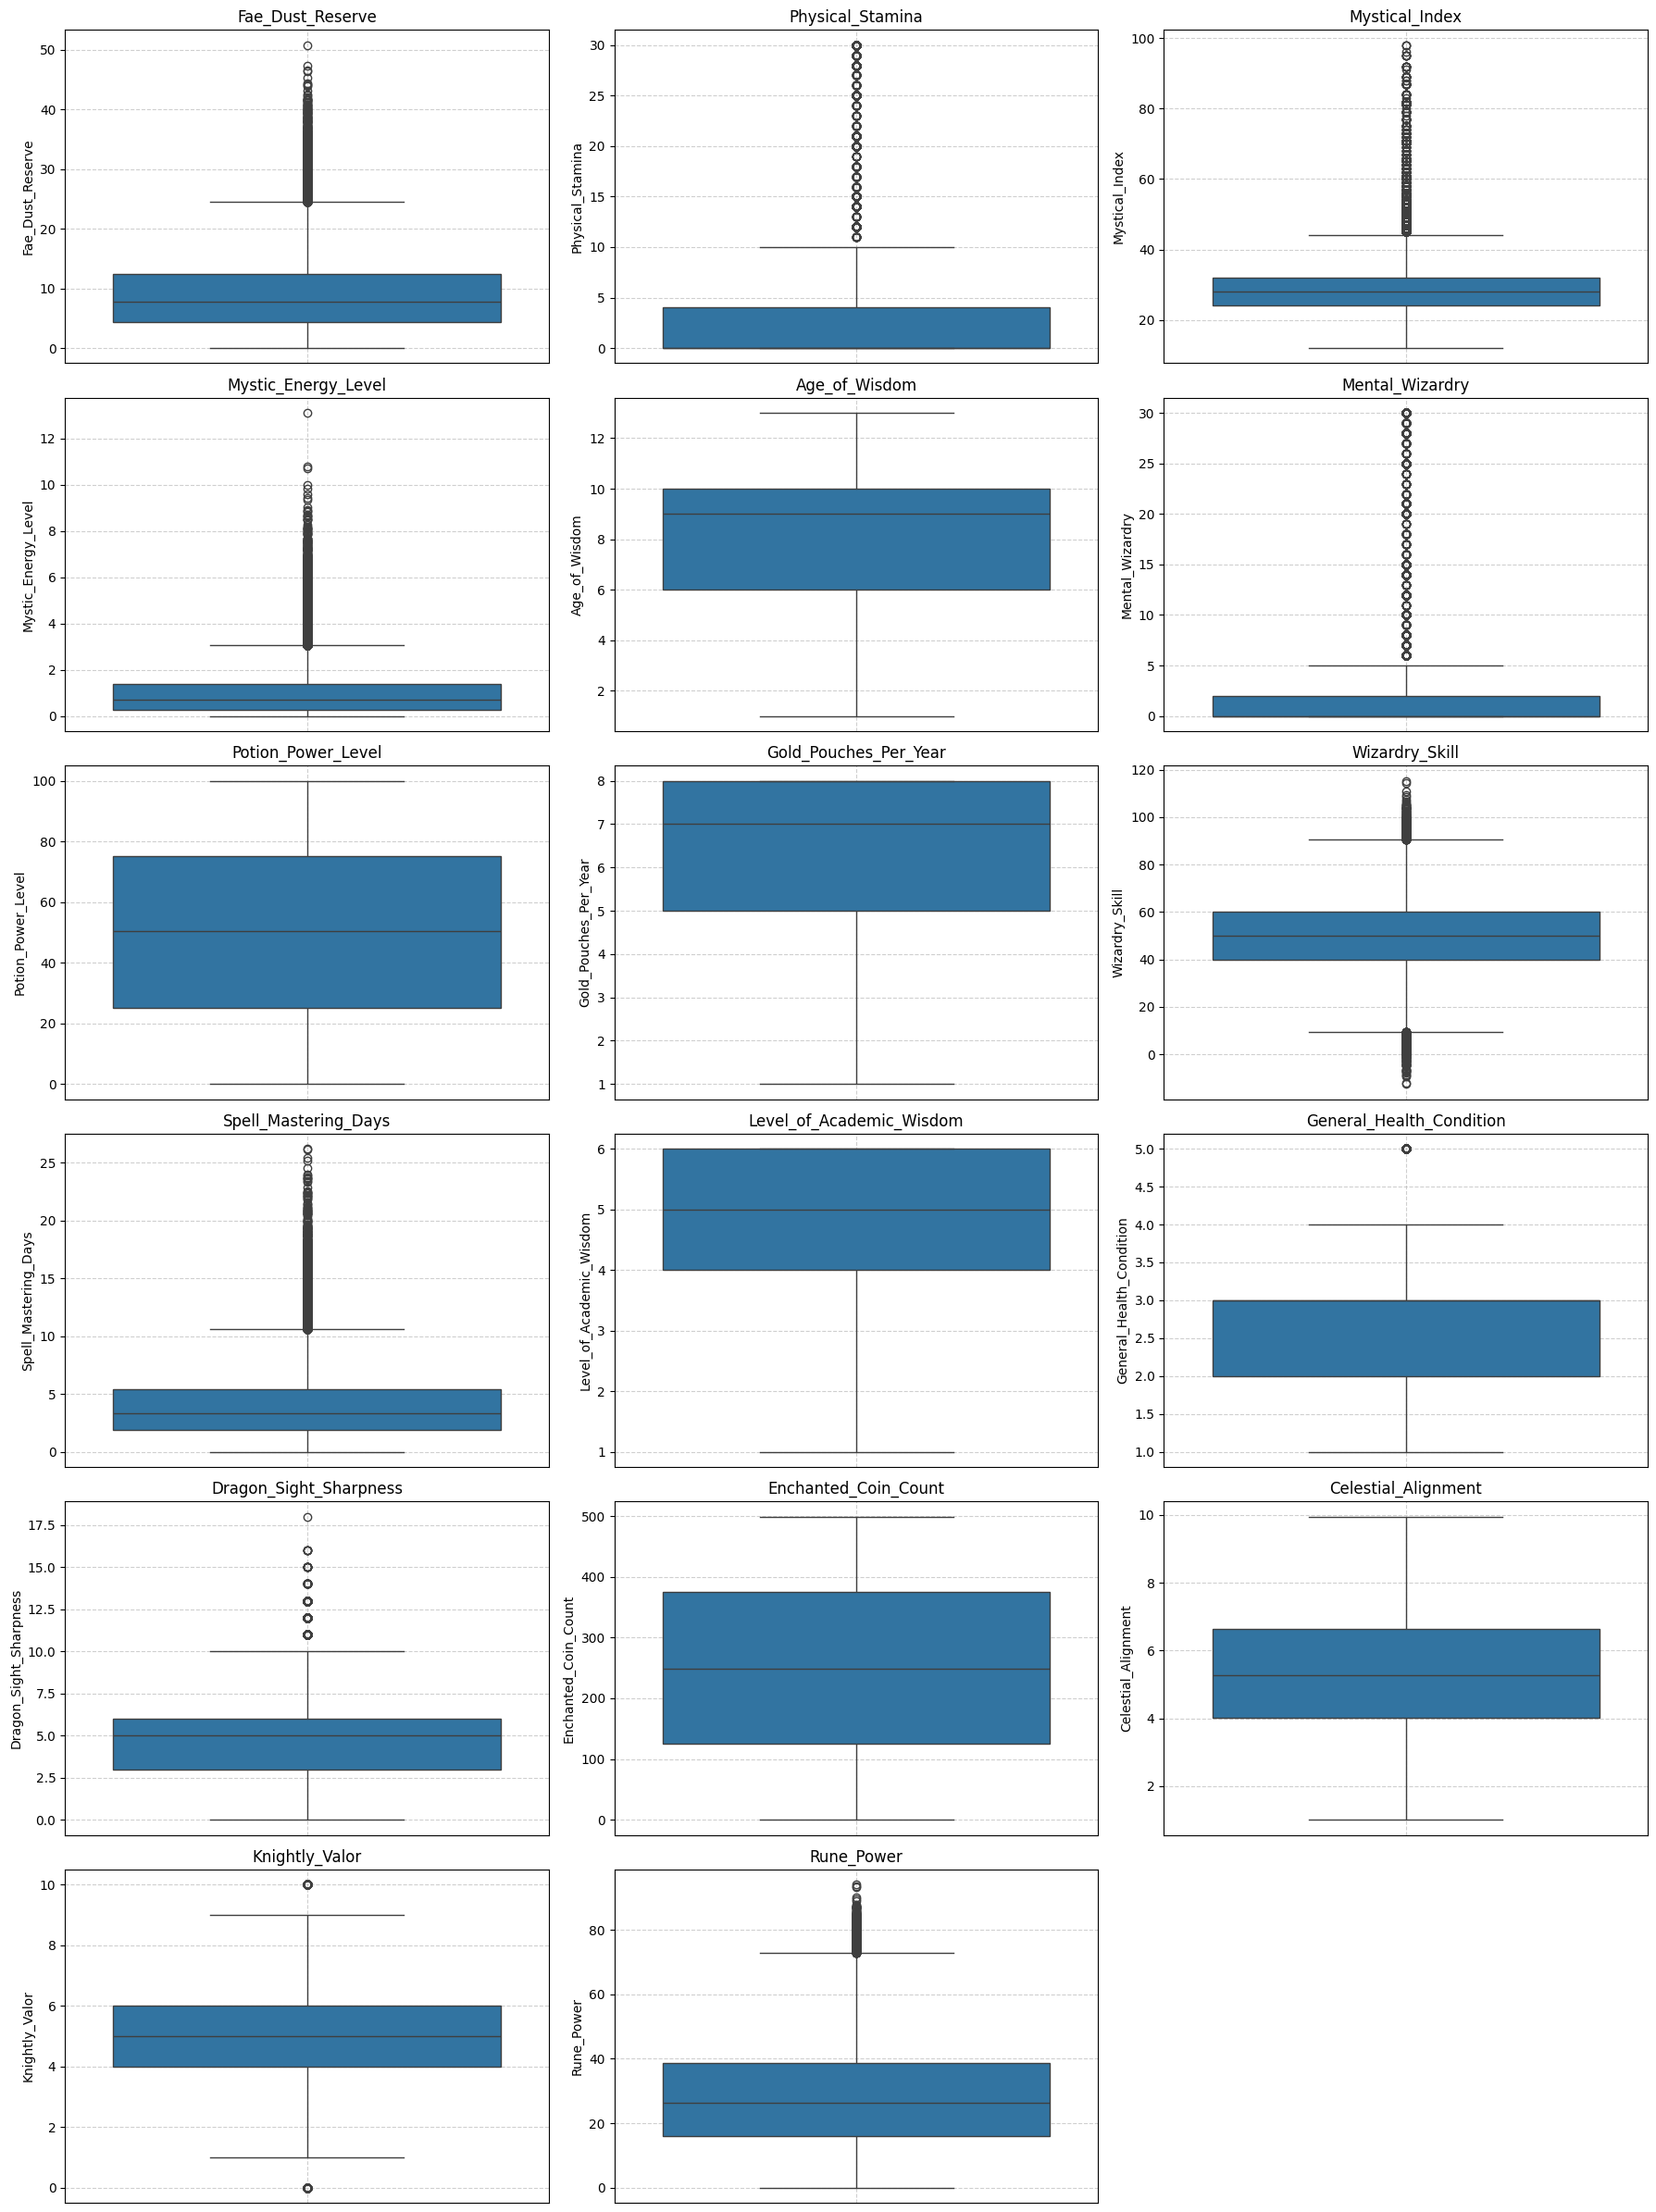

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns 
numerical_columns = ['Fae_Dust_Reserve','Physical_Stamina','Mystical_Index','Mystic_Energy_Level','Age_of_Wisdom','Mental_Wizardry','Potion_Power_Level',
                     'Gold_Pouches_Per_Year','Wizardry_Skill','Spell_Mastering_Days','Level_of_Academic_Wisdom','General_Health_Condition',
                     'Dragon_Sight_Sharpness','Enchanted_Coin_Count','Celestial_Alignment','Knightly_Valor','Rune_Power']


n_cols = 3  
n_rows = -(-len(numerical_columns) // n_cols)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()  

# Plot boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df_encoded, y=col, ax=axes[i])
    axes[i].set_title(col, fontsize=12)  
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  
    axes[i].grid(True, linestyle='--', alpha=0.6)  

# Deactivate unused plots 
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Distribution of main numeric features representation

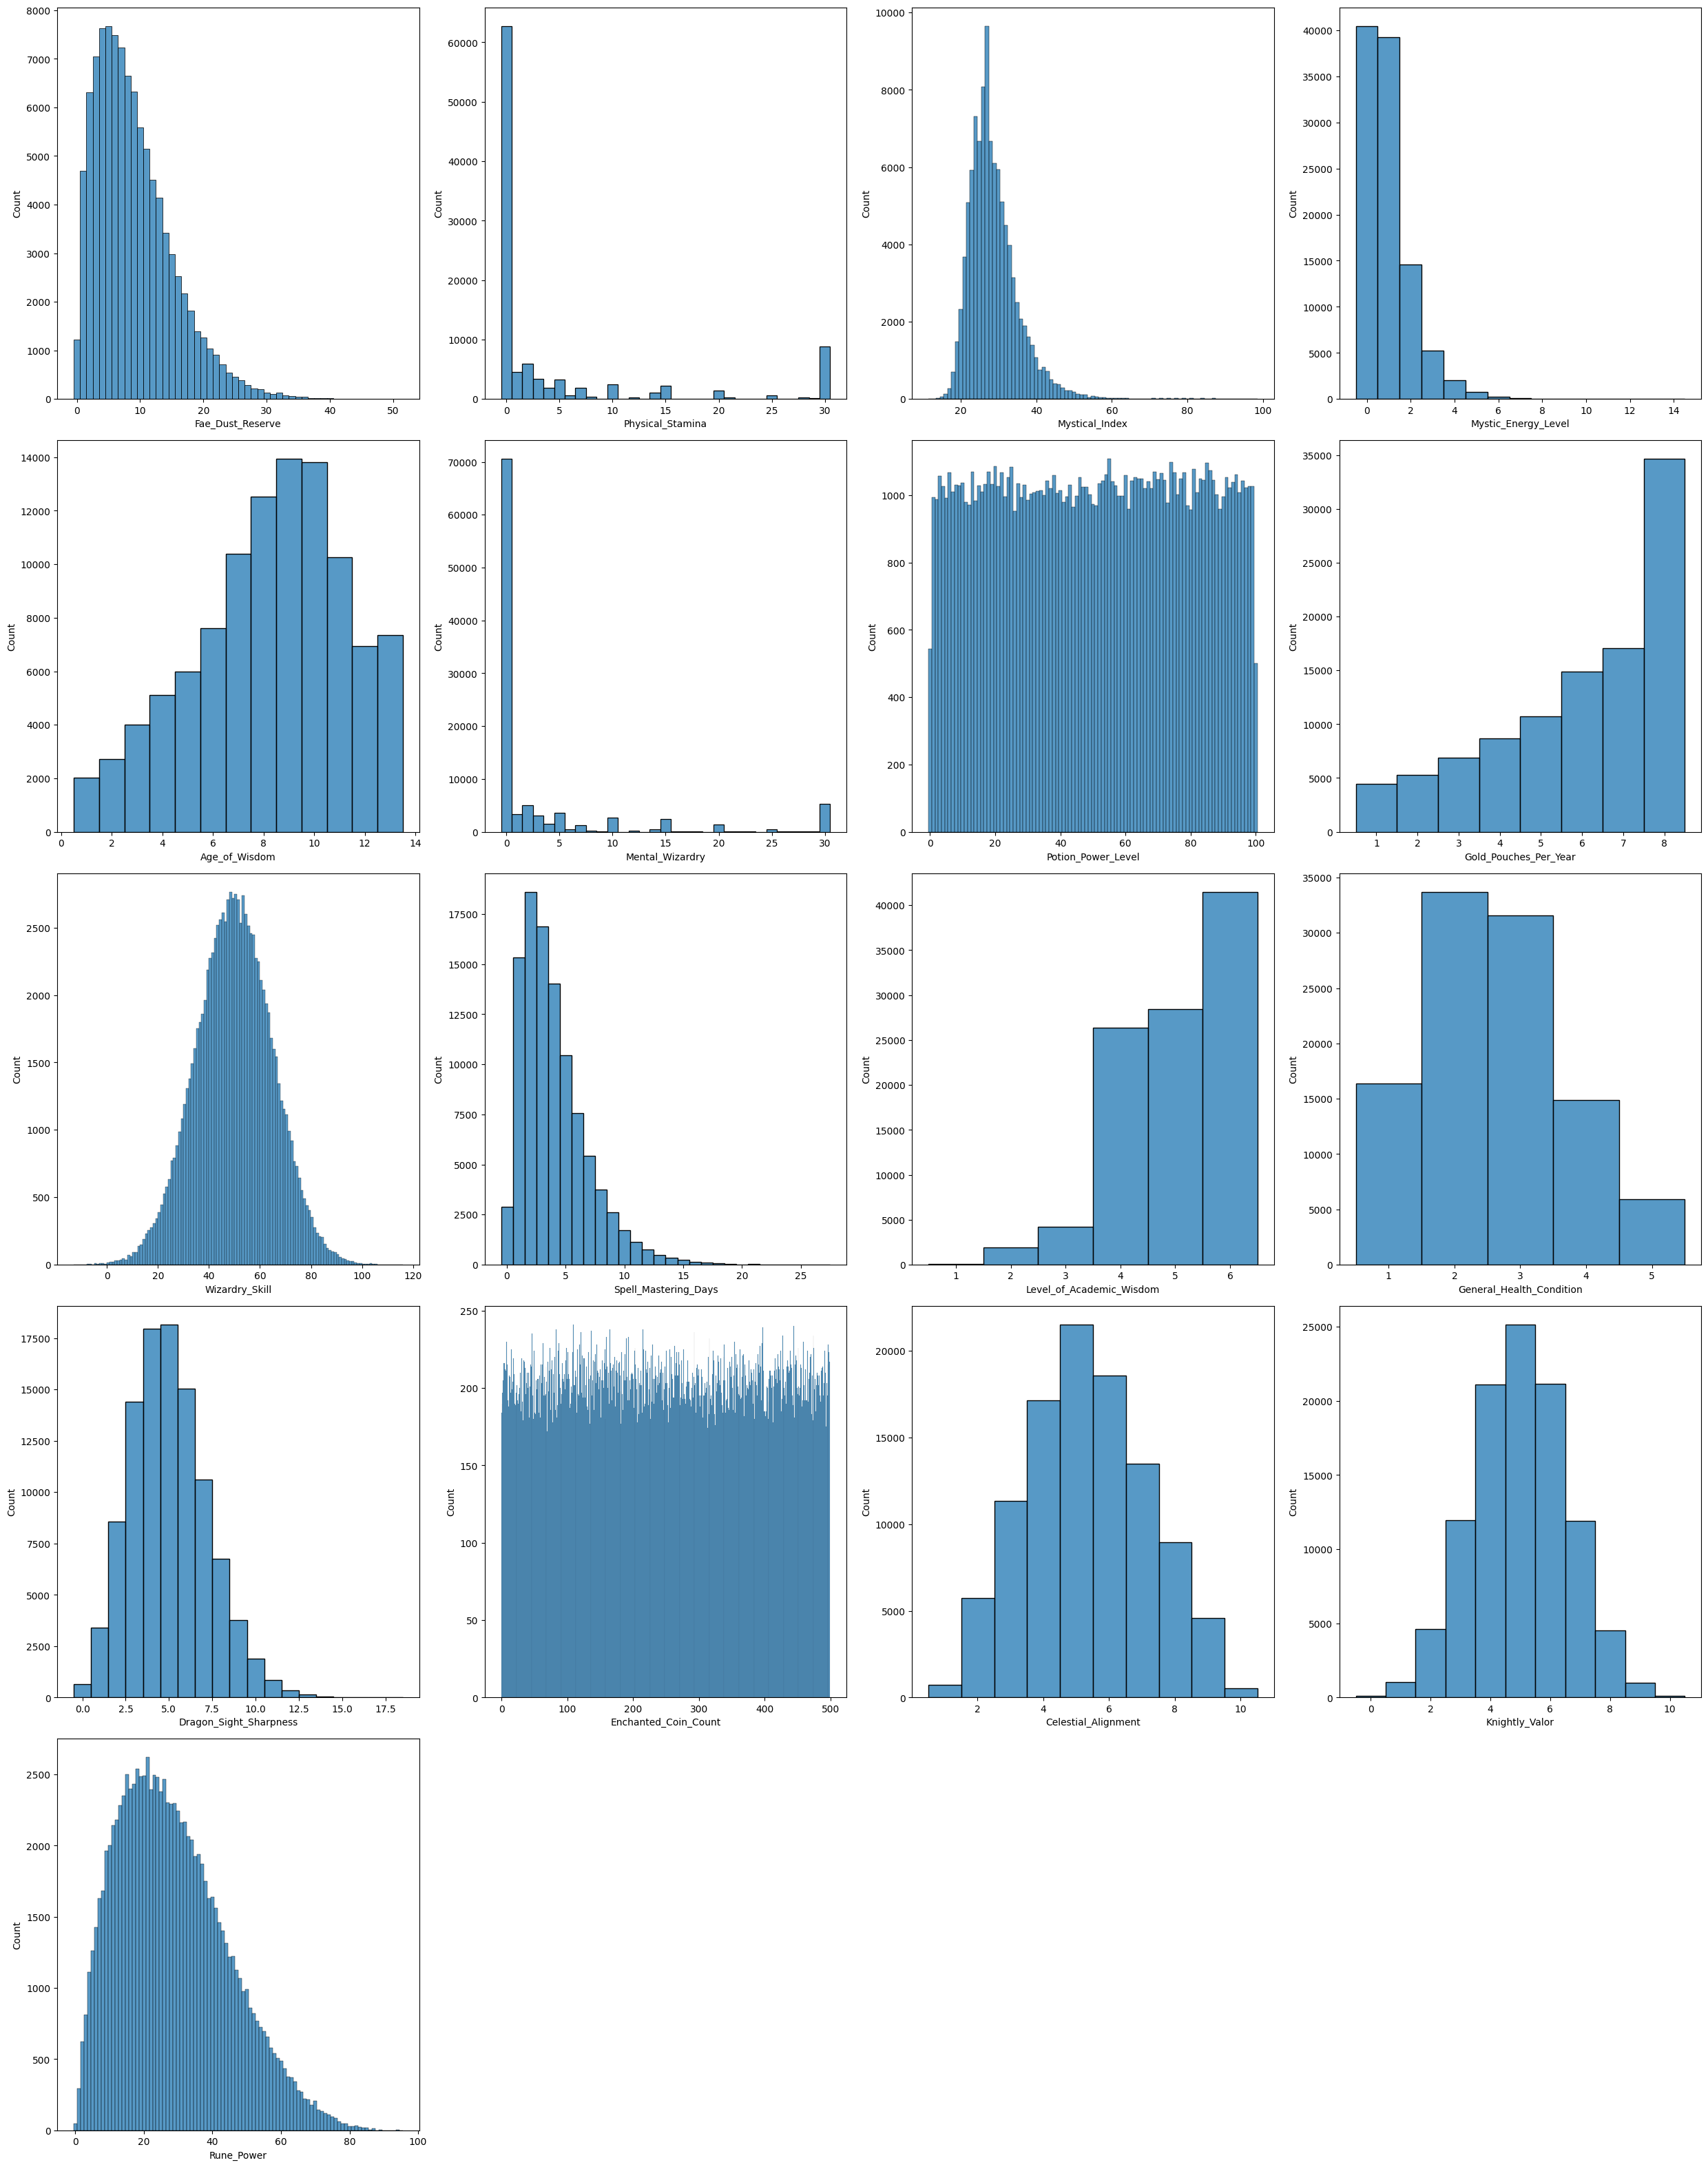

In [18]:
columns = ['Fae_Dust_Reserve','Physical_Stamina','Mystical_Index','Mystic_Energy_Level','Age_of_Wisdom','Mental_Wizardry','Potion_Power_Level',
                     'Gold_Pouches_Per_Year','Wizardry_Skill','Spell_Mastering_Days','Level_of_Academic_Wisdom','General_Health_Condition',
                     'Dragon_Sight_Sharpness','Enchanted_Coin_Count','Celestial_Alignment','Knightly_Valor','Rune_Power']

fig, axes = plt.subplots(8, 4, figsize=(25, 50))  
axes = axes.flatten()  

# cycle for every column and axes 
for ax, column in zip(axes, columns):
    sns.histplot(df_encoded, x=column, multiple='stack', discrete=True,ax=ax)



# Deactivate unused plots 
for i in range(len(columns), len(axes)):
    axes[i].set_visible(False)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()


### Row and Column count before the Outliers Removal

In [19]:
num_rows, num_columns = df_encoded.shape

print(f"The dataset has {num_rows} rows and {num_columns} columns")

The dataset has 108996 rows and 31 columns


### Outliers Removal
By looking at the distribution we manually remove all values that answer the following conditions:

In [20]:
print((df_encoded['Fae_Dust_Reserve'] > 30).sum())
print((df_encoded['Mystical_Index'] > 60).sum())
print((df_encoded['Mystic_Energy_Level'] > 6).sum())
print((df_encoded['Spell_Mastering_Days']>15).sum())
print((df_encoded['Rune_Power']>85).sum())
print((df_encoded['Dragon_Sight_Sharpness']>12).sum())
print((df_encoded['Wizardry_Skill']>100).sum())

601
353
243
498
27
191
43


In [21]:
df_encoded.drop(df_encoded[df_encoded['Fae_Dust_Reserve'] > 35].index, inplace=True)
df_encoded.drop(df_encoded[df_encoded['Mystical_Index'] > 60].index, inplace=True)
df_encoded.drop(df_encoded[df_encoded['Mystic_Energy_Level'] > 6].index, inplace=True)
df_encoded.drop(df_encoded[df_encoded['Spell_Mastering_Days'] > 15].index, inplace= True)
df_encoded.drop(df_encoded[df_encoded['Rune_Power']>85].index, inplace= True)
df_encoded.drop(df_encoded[df_encoded['Dragon_Sight_Sharpness']>12].index, inplace= True)
df_encoded.drop(df_encoded[df_encoded['Wizardry_Skill']>100].index, inplace= True)
num_rows, num_columns = df_encoded.shape

print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 107502 rows and 31 columns.


**CONCLUSION:** we dropped 1.494 rows

## Plot the correlation matrix for the data
This is a process that we will repeat again after the Nan values filling, in order to check wether we biased too much our data. The heatmap will help us understand:
- the Database structure attributes correlation
-  which column to drop off to facilitate our analysis

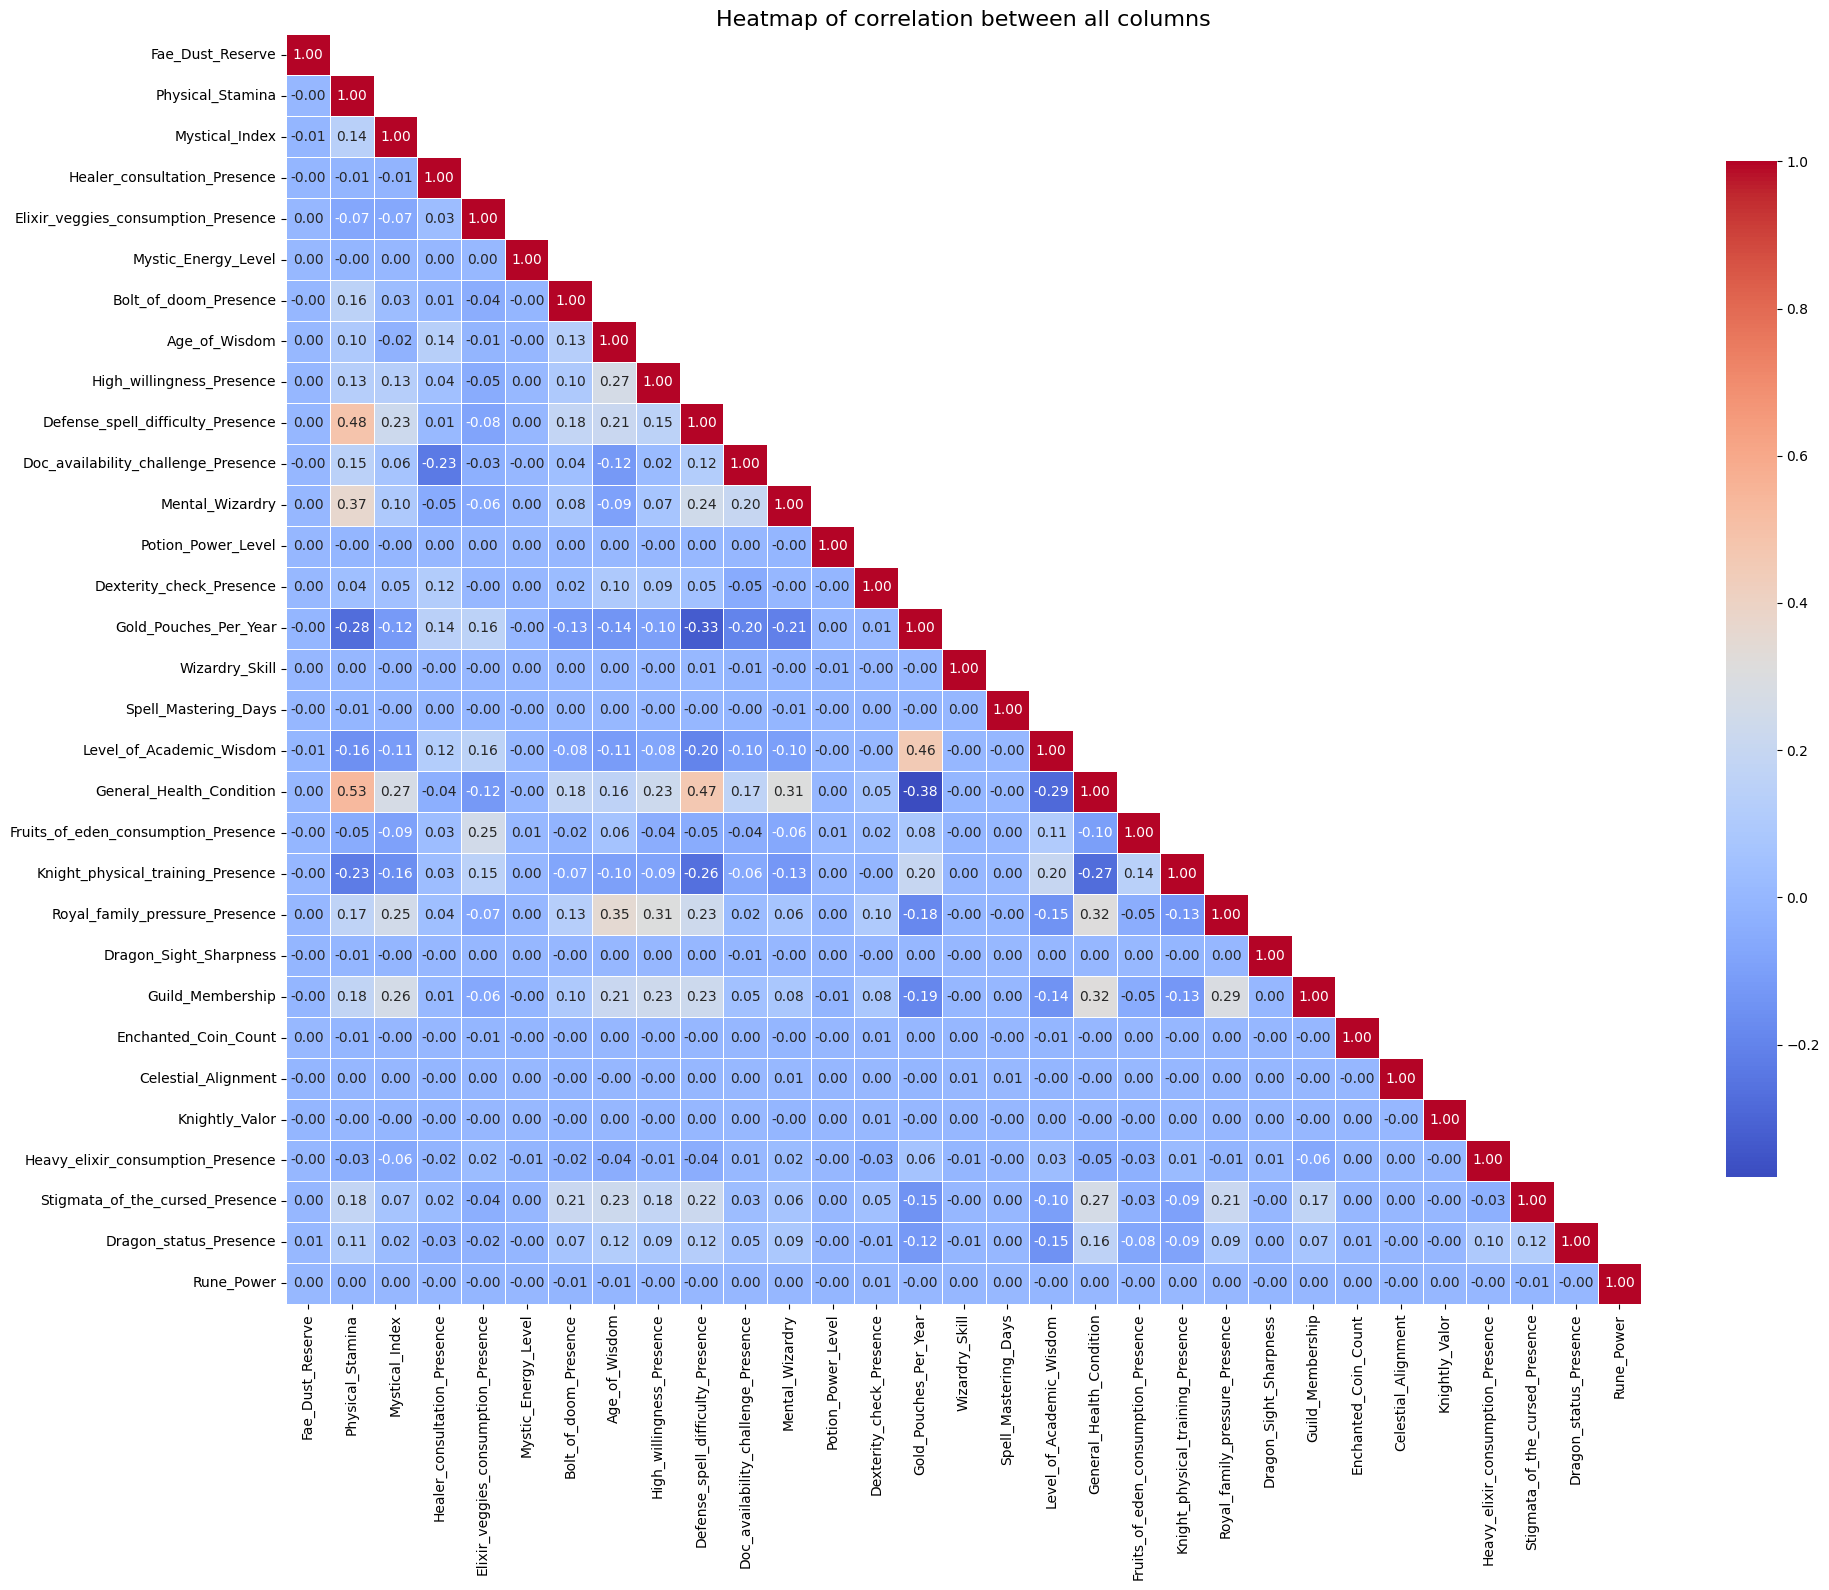

In [22]:
# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Create a mask to plot the lower triangle, including the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)


# Create heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix,
        mask = mask,
        annot=True,        
        fmt=".2f",         
        cmap="coolwarm",   
        cbar_kws={'shrink': 0.8},  
        linewidths=0.5)
plt.title("Heatmap of correlation between all columns", fontsize=16)
plt.tight_layout()
plt.show()


### Sorted Correlation

C:\Users\stefa\AppData\Local\Temp\ipykernel_10748\527506061.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attribute_correlation.index, y=attribute_correlation.values, palette='viridis')


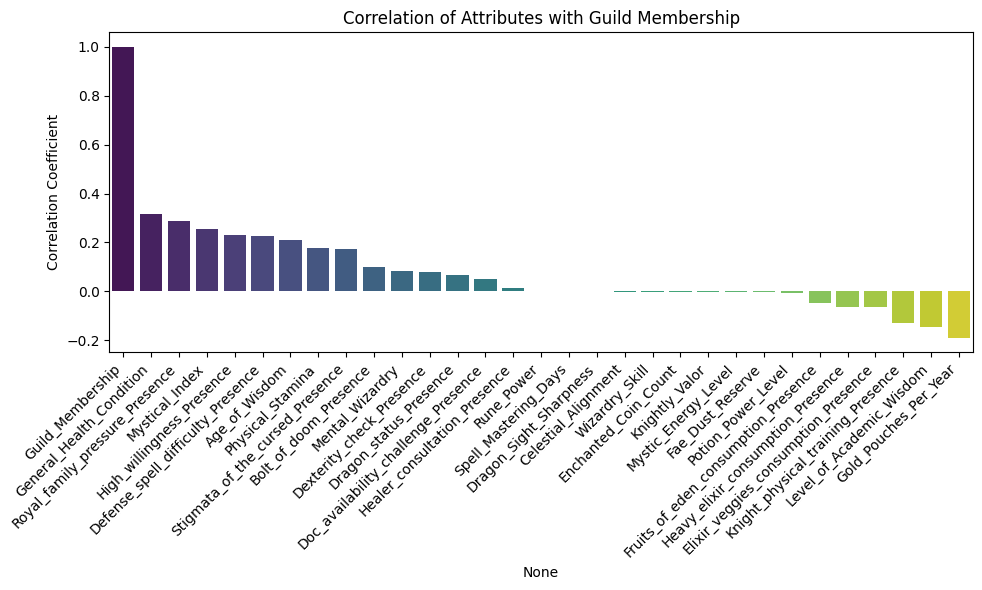

Guild_Membership                       1.000000
General_Health_Condition               0.318193
Royal_family_pressure_Presence         0.288954
Mystical_Index                         0.256573
High_willingness_Presence              0.231075
Defense_spell_difficulty_Presence      0.225297
Age_of_Wisdom                          0.212187
Physical_Stamina                       0.179354
Stigmata_of_the_cursed_Presence        0.172778
Bolt_of_doom_Presence                  0.099920
Mental_Wizardry                        0.083923
Dexterity_check_Presence               0.080584
Dragon_status_Presence                 0.068200
Doc_availability_challenge_Presence    0.050698
Healer_consultation_Presence           0.012440
Rune_Power                             0.001391
Spell_Mastering_Days                   0.000849
Dragon_Sight_Sharpness                 0.000651
Celestial_Alignment                   -0.001103
Wizardry_Skill                        -0.001923
Enchanted_Coin_Count                  -0

In [23]:
# Sorting correlations with 'Guild_Membership' in descending order for a focused view
attribute_correlation = correlation_matrix['Guild_Membership'].sort_values(ascending=False)

# Plotting the correlation values with 'price' for top features
plt.figure(figsize=(10, 6))
sns.barplot(x=attribute_correlation.index, y=attribute_correlation.values, palette='viridis')
plt.title("Correlation of Attributes with Guild Membership")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

attribute_correlation

### Drop the columns that have absolute correlations value with Guild_Membership < 0.7
We choosed this theeshold cause it gave us the best balance in the model performance and column reduction

In [24]:
# Get the list of columns to drop based on absolute correlation <= 0.07
columns_to_drop = [col for col in df_encoded.columns if abs(df_encoded[col].corr(df_encoded['Guild_Membership'])) < 0.07]

# Drop chosen columns
df_encoded = df_encoded.drop(columns=columns_to_drop, axis=1)

# Check results
print("Columns remaining after the drop:")
print(df_encoded.columns)


Columns remaining after the drop:
Index(['Physical_Stamina', 'Mystical_Index', 'Bolt_of_doom_Presence',
       'Age_of_Wisdom', 'High_willingness_Presence',
       'Defense_spell_difficulty_Presence', 'Mental_Wizardry',
       'Dexterity_check_Presence', 'Gold_Pouches_Per_Year',
       'Level_of_Academic_Wisdom', 'General_Health_Condition',
       'Knight_physical_training_Presence', 'Royal_family_pressure_Presence',
       'Guild_Membership', 'Stigmata_of_the_cursed_Presence'],
      dtype='object')


In [25]:
df_encoded.shape

(107502, 15)

**CONCLUSION:** We dropped 16 columns

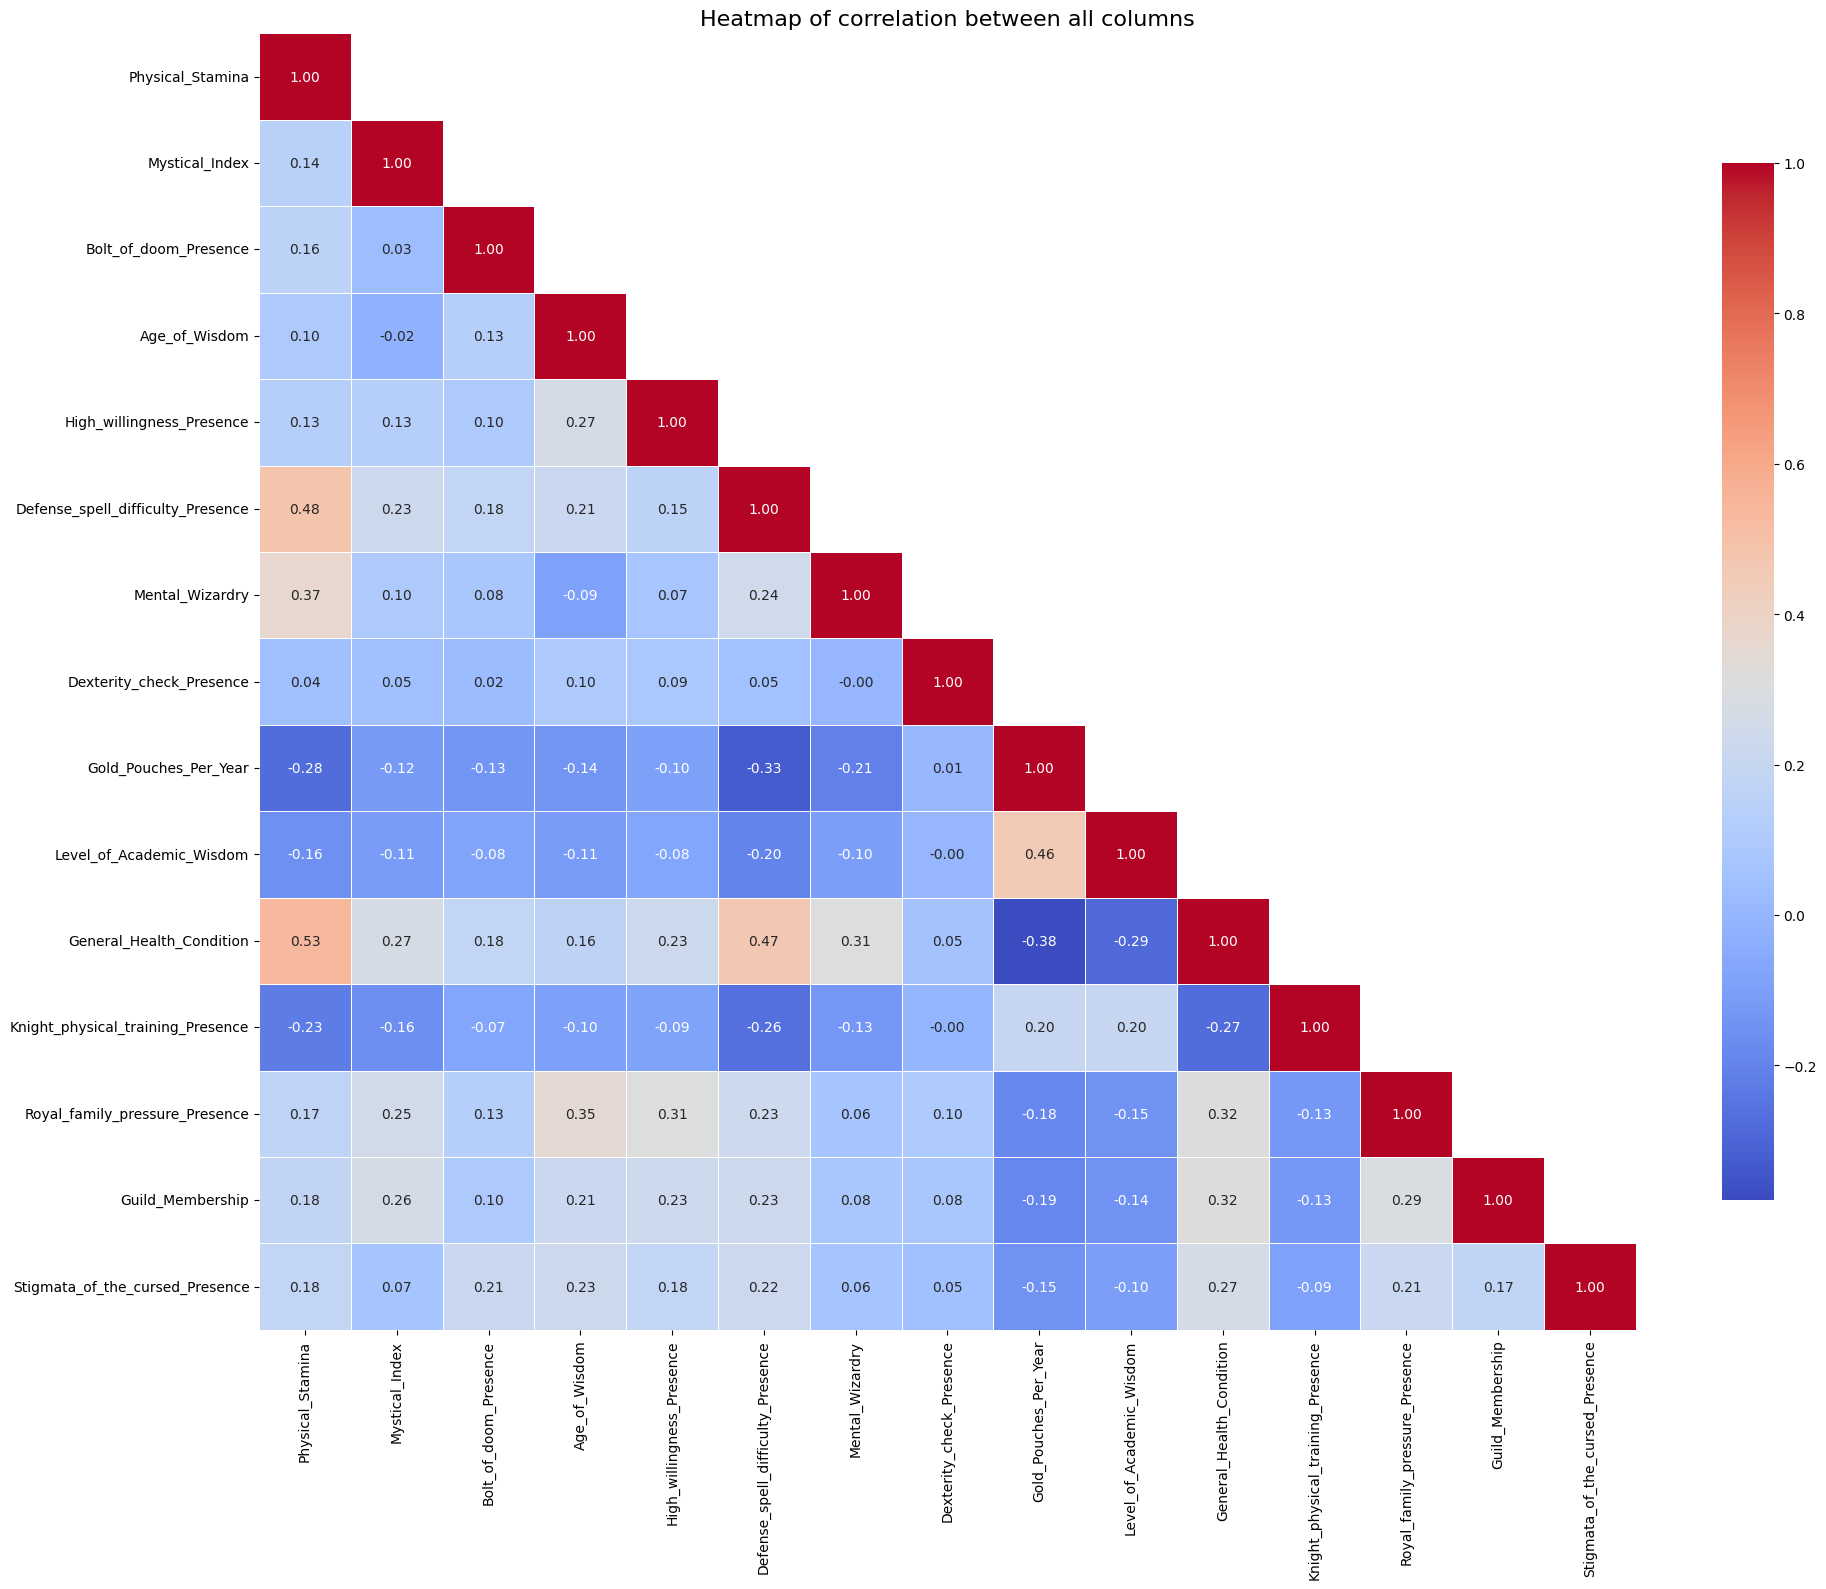

In [26]:
# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Create a mask to plot the lower triangle, including the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Create heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix,
        mask = mask,
        annot=True,        
        fmt=".2f",         
        cmap="coolwarm",   
        cbar_kws={'shrink': 0.8},  
        linewidths=0.5     
)
plt.title("Heatmap of correlation between all columns", fontsize=16)
plt.tight_layout()
plt.show()


**OBSERVATIONS**: The heatmap remained almost the same, so we can conclude that we did not biased too much our database.

## Feature Scaling
**Feature scaling** is crucial for adjusting the scales of features (variables) so they contribute equally to the learning process.
 
In particular we decided to use **Robust Scaling** that uses statistics which are robust to outliers to scale the data.

### Robust Scaler Application

In [27]:
from sklearn.preprocessing import RobustScaler


# Select numerical cols (they are all the cols in the dataset since we have encoded the categorical)
numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns


# Apply robust scaler 
scaler = RobustScaler()
scaled_numerical = pd.DataFrame(scaler.fit_transform(df_encoded[numerical_columns]), 
                                columns=numerical_columns, index=df_encoded.index)



# Put together numerical and categorical cols
final_df = pd.concat([scaled_numerical], axis=1)

# Control transformed data
print(final_df.head())


   Physical_Stamina  Mystical_Index  Bolt_of_doom_Presence  Age_of_Wisdom  \
0               0.0           0.125                    0.0          -0.25   
1               1.0           1.250                    0.0           0.50   
3               0.0           0.375                    0.0           0.25   
5               0.0           0.750                    NaN           0.50   
6               0.0          -0.500                    0.0          -0.25   

   High_willingness_Presence  Defense_spell_difficulty_Presence  \
0                        1.0                                0.0   
1                        1.0                                0.0   
3                        0.0                                0.0   
5                        0.0                                1.0   
6                        0.0                                0.0   

   Mental_Wizardry  Dexterity_check_Presence  Gold_Pouches_Per_Year  \
0              NaN                       0.0              -2.00

In [28]:
print(final_df.columns)


Index(['Physical_Stamina', 'Mystical_Index', 'Bolt_of_doom_Presence',
       'Age_of_Wisdom', 'High_willingness_Presence',
       'Defense_spell_difficulty_Presence', 'Mental_Wizardry',
       'Dexterity_check_Presence', 'Gold_Pouches_Per_Year',
       'Level_of_Academic_Wisdom', 'General_Health_Condition',
       'Knight_physical_training_Presence', 'Royal_family_pressure_Presence',
       'Guild_Membership', 'Stigmata_of_the_cursed_Presence'],
      dtype='object')


### Smaller sample Creation 

We create the smaller sample trying to preserve, as much as possible, the original distribution of the variable.

We take:
- 10 thousand entries where Guild_Membership = No_Guild 
- 6 thousand where Guils_Membership = Master_guild 
- All the rows (4102) where Guild_Membership = Apprentice_Guild 

from the Partial Database where Guild Membership null values are not considered.

In [29]:
no_guild = final_df[final_df['Guild_Membership'] == 0]
master_guild = final_df[final_df['Guild_Membership'] == 1]
apprentice_guild = final_df[final_df['Guild_Membership'] == 2]
# Sample 10k rows for No_Guild and 6k rows for Master_Guild
no_guild_sampled = no_guild.sample(n=10000, random_state=42)
master_guild_sampled = master_guild.sample(n=6000, random_state=42)

# Put the three parts together to create the full dataset
guild_smaller = pd.concat([apprentice_guild, no_guild_sampled, master_guild_sampled])

In [30]:
guild_smaller.shape


(20102, 15)

In [31]:
# Count for all values in Guild_Membership
guild_counts = guild_smaller['Guild_Membership'].value_counts()

# Count Values for each:  No_Guild, Master_Guild, Apprentice_Guild
specific_counts = guild_counts.loc[[0, 1, 2]]

print(specific_counts)

Guild_Membership
0.0    10000
1.0     6000
2.0     4102
Name: count, dtype: int64


### KNN Imputer Application  

- **Step 1:** We start by selecting `numerical columns` in our dataset. Since all columns were encoded as numerical before, this step  will implicitly include all columns.  

- **Step 2:** We initialize the KNN imputer to fill the missing values for each column using the `5 nearest neighbors`.  

- **Step 3:** For each missing value, the KNN imputer identifies the 5 nearest neighbors and fills the value based on:  
  - **Numerical Columns:** The mean of the values of the nearest neighbors.  
  - **Categorical Columns:** The most frequent category among the nearest neighbors.  


In [32]:
from sklearn.impute import KNNImputer

# Select numerical cols
numerical_cols = guild_smaller.select_dtypes(include=['float64', 'int64']).columns

# Initialize KNN
knn_imputer = KNNImputer(n_neighbors=5)  

# Use KNN on numerical cols
guild_smaller.loc[:, numerical_cols] = knn_imputer.fit_transform(guild_smaller[numerical_cols])


### KNN Performance Check
By looking again at the amount of missing values we are able to check wether the KNN has worked or not

In [33]:
# Check for missing values
missing_values = guild_smaller.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
Physical_Stamina                     0
Mystical_Index                       0
Bolt_of_doom_Presence                0
Age_of_Wisdom                        0
High_willingness_Presence            0
Defense_spell_difficulty_Presence    0
Mental_Wizardry                      0
Dexterity_check_Presence             0
Gold_Pouches_Per_Year                0
Level_of_Academic_Wisdom             0
General_Health_Condition             0
Knight_physical_training_Presence    0
Royal_family_pressure_Presence       0
Guild_Membership                     0
Stigmata_of_the_cursed_Presence      0
dtype: int64


We see that there are no more missing values and so we can say that KNN worked

## 4. Models Testing
This step involves applying machine learning algorithms to the data to build predictive models.
In particular we:
1) Splitted the data into training and testing sets.
2) Tried Radom Forest, Logistic Regression, KSVM and Cart Trees as our machine learning algorithms.
3) Trained the model and tuned its parameters.
4) Evaluated and Compared the models performance using metrics like accuracy, precision, or F1 score.

### Train-Test Stratified Split
The split in training and testing tests allow us to:
- Simulate how the model would perform in real-world scenario
- Evaluate our models
- Avoide Overfitting 
- Estimate the generalization ability of our models



In particular we decided to use a `Stratified splitting` that allows us to mantain the **same class distribution** in both training and testing sets --> ensurance of adequate representation of minority classes in both subsets.


### Dataset Splitting  

The dataset is split into three subsets in two steps:  

1. **First Split:**  
   - The entire dataset is divided into:  
     - **Training Set:** 70% of the full data.  
     - **Test Set:** 30% of the full data.  

2. **Second Split:**  
   - The **Training Set** from the first split is further divided into:  
     - **Training Set:** 70% of the original training data.  
     - **Validation Set:** 30% of the original training data.  


In [34]:
from sklearn.model_selection import train_test_split


X = guild_smaller.drop(columns=["Guild_Membership"])  
y = guild_smaller["Guild_Membership"]  

# 1. Initial Split: {Train + Validation} = (70%) and {Test} = (30%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Split of {Train + Validation} in:  {Train} = (70%) and {Validation} = (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42, stratify=y_train_val)

# Dimension of the sets 
print("Train Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Test Set:", X_test.shape, y_test.shape)


Train Set: (9849, 14) (9849,)
Validation Set: (4222, 14) (4222,)
Test Set: (6031, 14) (6031,)


In [35]:
# Calculate the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculate the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

val_unique_vals, val_counts = np.unique(y_val, return_counts=True)

# Calculate the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Print the distributions
print("Distribution of y (Original Dataset):")
print(f"Class {unique_vals[0]}: {original_counts[0]} samples")
print(f"Class {unique_vals[1]}: {original_counts[1]} samples")
print(f"Class {unique_vals[2]}: {original_counts[2]} samples")

print("\nDistribution of y_train (Training Set):")
print(f"Class {train_unique_vals[0]}: {train_counts[0]} samples")
print(f"Class {train_unique_vals[1]}: {train_counts[1]} samples")
print(f"Class {train_unique_vals[2]}: {train_counts[2]} samples")

print("\nDistribution of y_val (Validation Set):")
print(f"Class {val_unique_vals[0]}: {val_counts[0]} samples")
print(f"Class {val_unique_vals[1]}: {val_counts[1]} samples")
print(f"Class {val_unique_vals[2]}: {val_counts[2]} samples")

print("\nDistribution of y_test (Test Set):")
print(f"Class {test_unique_vals[0]}: {test_counts[0]} samples")
print(f"Class {test_unique_vals[1]}: {test_counts[1]} samples")
print(f"Class {test_unique_vals[2]}: {test_counts[2]} samples")


Distribution of y (Original Dataset):
Class 0.0: 10000 samples
Class 1.0: 6000 samples
Class 2.0: 4102 samples

Distribution of y_train (Training Set):
Class 0.0: 4900 samples
Class 1.0: 2940 samples
Class 2.0: 2009 samples

Distribution of y_val (Validation Set):
Class 0.0: 2100 samples
Class 1.0: 1260 samples
Class 2.0: 862 samples

Distribution of y_test (Test Set):
Class 0.0: 3000 samples
Class 1.0: 1800 samples
Class 2.0: 1231 samples


# Cart trees 

We attempted to use CART (Classification and Regression Trees), despite their tendency to struggle with imbalanced datasets and multi-class problems. This is because they often overfit to the majority class and fail to effectively detect minority classes.

But in this is the case we wanted to show their performance

Accuracy on Validation Set: 0.52
Classification Report (Validation Set):
              precision    recall  f1-score   support

         0.0       0.66      0.67      0.66      2100
         1.0       0.45      0.44      0.44      1260
         2.0       0.28      0.27      0.28       862

    accuracy                           0.52      4222
   macro avg       0.46      0.46      0.46      4222
weighted avg       0.52      0.52      0.52      4222



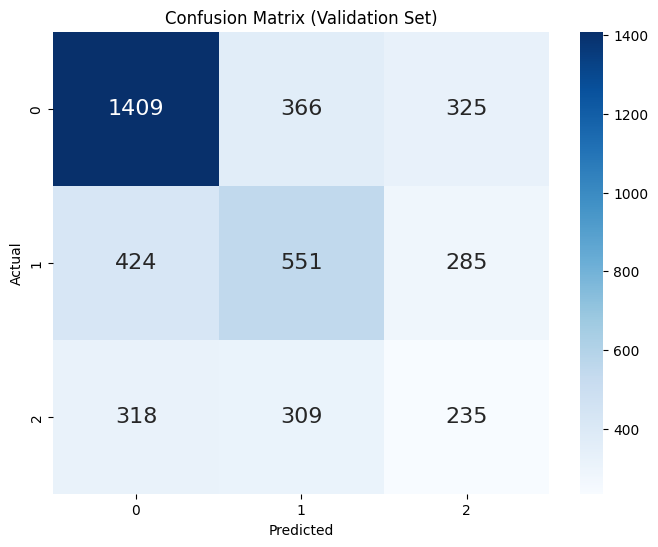

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

cart_model = DecisionTreeClassifier(random_state=42)

# Training
cart_model.fit(X_train, y_train)


# predictions on validation 
y_val_pred = cart_model.predict(X_val)

# accuracy

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy on Validation Set: {val_accuracy:.2f}')

# Classification report
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation Set)')
plt.show()



# Random Forest

We then decided to try Random Forest because it combines multiple decision trees to improve classification accuracy and robustness. Random Forest handles multi-class target variables effectively and is less prone to overfitting issues that we had with single decision trees.

Given our dataset's imbalanced nature and the presence of both numerical and categorical features, Random Forest seemed to be a good choice. We anticipated good performance, especially on the majority class, while recognizing potential challenges in correctly classifying minority classes.

Accuracy: 0.60

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.79      0.73      2100
         1.0       0.52      0.61      0.56      1260
         2.0       0.38      0.14      0.20       862

    accuracy                           0.60      4222
   macro avg       0.53      0.51      0.50      4222
weighted avg       0.57      0.60      0.57      4222



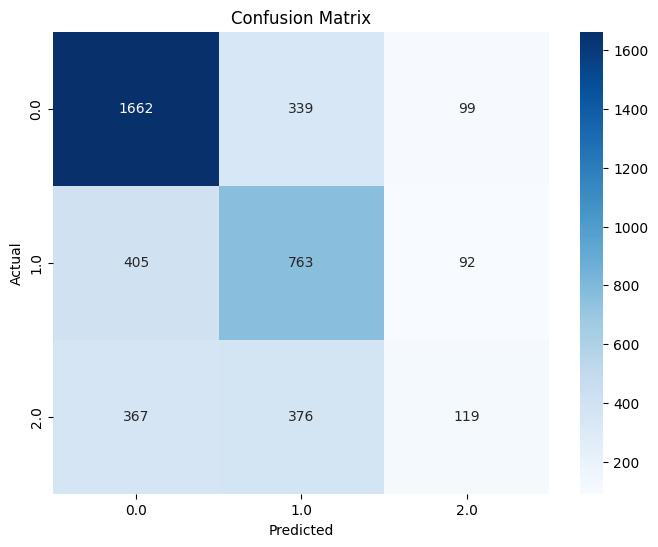

In [37]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


# Step 1: Make predictions
y_pred = rf.predict(X_val)

# Step 2: Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Step 3: Plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



### Comment
The model correctly classified 60% of the samples, which is moderately good (Accuracy=0.6) In particular:
- Class 0 (No guild) is the most recognizied class 
- Class 1 (Master_Guild): only 52% of predicted samples are correct and only 61% are correctly identified
- Class 2 (Apprentice_GUild): only 38% of predicted sample are correct and only 14% are correctly

## Logistic Regression


We included Logistic Regression as it is a simple yet effective algorithm for multi-class classification problems. Using its multinomial configuration, Logistic Regression could become a good model to use for this problem.

Although Logistic Regression is less flexible than tree-based models like Random Forest, it is computationally efficient and interpretable. However, we anticipated that its linear functions might limit its ability to capture complex patterns in our data.

C:\Users\stefa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.60
Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.83      0.73      2100
         1.0       0.51      0.61      0.56      1260
         2.0       0.23      0.01      0.02       862

    accuracy                           0.60      4222
   macro avg       0.47      0.49      0.44      4222
weighted avg       0.53      0.60      0.53      4222



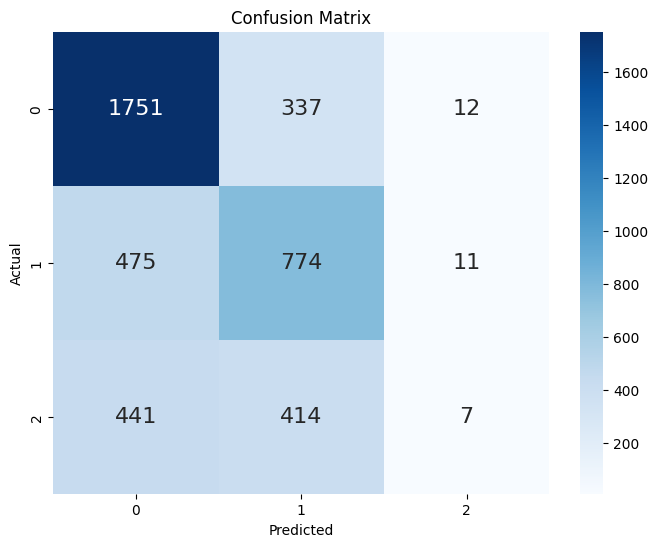

Macro-Averaged ROC AUC: 0.74
Weighted-Averaged ROC AUC: 0.76


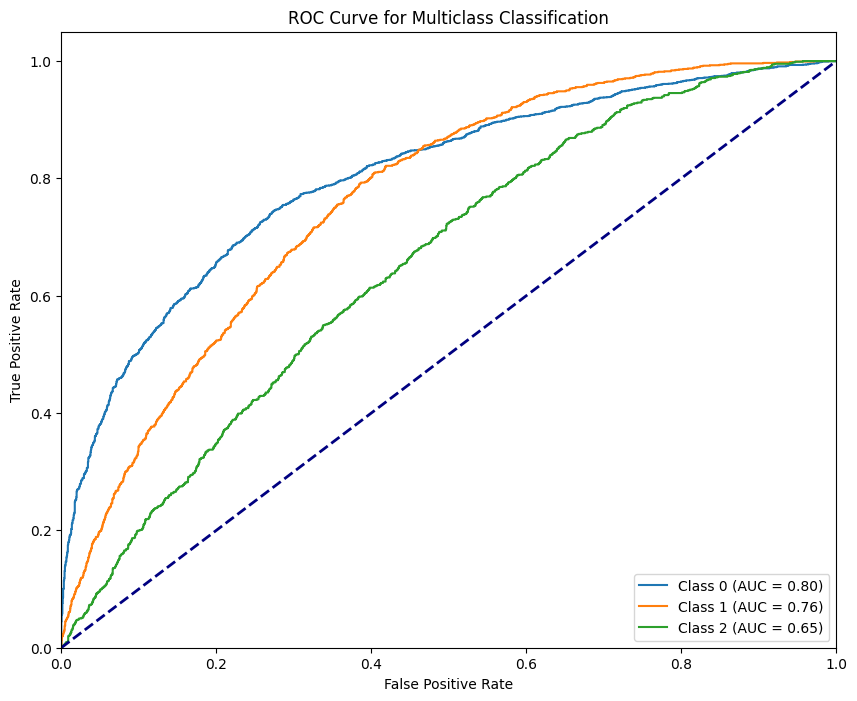

In [38]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression



from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

# Make predictions using the trained Logistic Regression model
y_val_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision, recall, and F1-score
report = classification_report(y_val, y_val_pred)
print('Classification Report:\n', report)


# Calculate confusion matrix
confusion = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Binarize the labels for ROC and AUC (multiclass handling)
y_val_binarized = label_binarize(y_val, classes=[0, 1, 2])  # Adjust classes as per your dataset
y_prob = model.predict_proba(X_val)

# Calculate and print macro-averaged AUC
macro_roc_auc = roc_auc_score(y_val_binarized, y_prob, multi_class="ovr", average="macro")
print(f'Macro-Averaged ROC AUC: {macro_roc_auc:.2f}')

# Calculate and print weighted-averaged AUC
weighted_roc_auc = roc_auc_score(y_val_binarized, y_prob, multi_class="ovr", average="weighted")
print(f'Weighted-Averaged ROC AUC: {weighted_roc_auc:.2f}')

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(y_val_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_prob[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()


### Comment
The model correctly classified 60% of the samples, which is moderately good (Accuracy=0.6) In particular:
- Class 0 (No guild) is the most recognizied class (66% accuracy)
- Class 1 (Master_Guild): only 51% of predicted samples are correct and only 61% are correctly identified
- Class 2 (Apprentice_GUild): only 23% of predicted sample are correct and only 10% are correctly identified

Moreover, The weighted-averaged AUC of 0.76 is a good indicator of the `model's overall performance`, driven largely by the dominant Class 0. However, the **lower macro-average AUC** of 0.74 emphasizes the need to improve predictions for the minority classes to achieve a more balanced model.

## KSVM

We selected KSVM because it is well-suited for handling classification problems where the decision boundary between classes is non-linear. By using the kernel trick, KSVM maps the original data into a higher-dimensional space where the classes can become linearly separable.

While KSVM is powerful for non-linear problems, it is computationally expensive, especially with large datasets like ours. We thought that KSVM might perform well on specific classes but struggle with scalability and imbalanced data.

Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.84      0.73      2100
         1.0       0.51      0.60      0.55      1260
         2.0       0.12      0.00      0.00       862

    accuracy                           0.60      4222
   macro avg       0.43      0.48      0.43      4222
weighted avg       0.50      0.60      0.53      4222



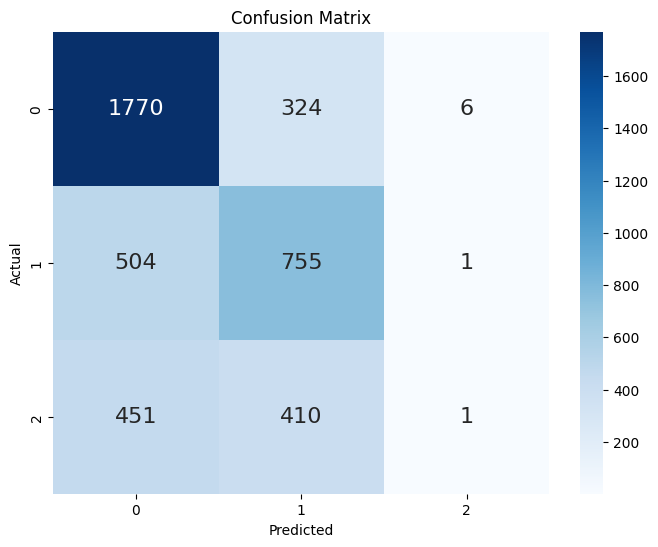

ROC AUC (One-vs-Rest): 0.71


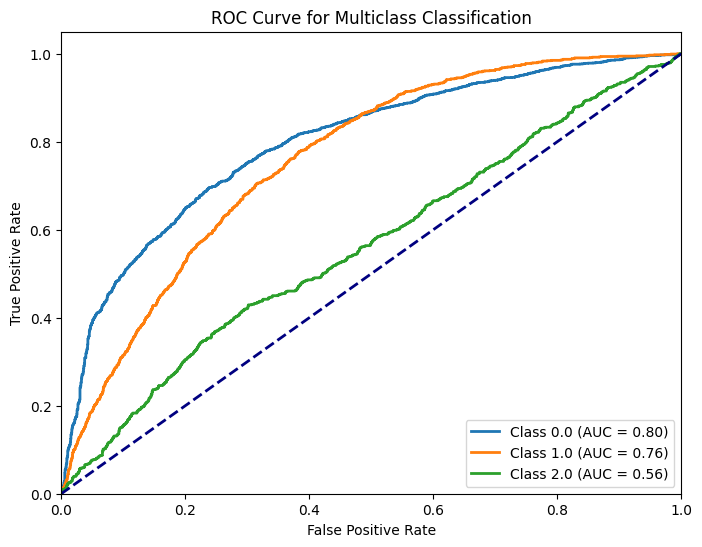

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.svm import SVC

ksvm = SVC( probability=True, random_state=42)

# Training
ksvm.fit(X_train, y_train)

# Prediction on validation set
y_val_pred = ksvm.predict(X_val)


# Prediction of probabilities to calculate ROC and Precision-Recall
y_prob = ksvm.predict_proba(X_val)

# accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classificaation report
print('Classification Report:')
print(classification_report(y_val, y_val_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC and AUC
# Calculate  AUC using  one-vs-rest (ovr) for multiclass problem
roc_auc = roc_auc_score(y_val, y_prob, multi_class='ovr')
print(f'ROC AUC (One-vs-Rest): {roc_auc:.2f}')

# Plot all ROC curves on the same graph
plt.figure(figsize=(8, 6))

# Loop through all classes and plot each ROC curve
for i in range(len(ksvm.classes_)):
    fpr, tpr, thresholds = roc_curve(y_val == ksvm.classes_[i], y_prob[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {ksvm.classes_[i]} (AUC = {roc_auc_score(y_val == ksvm.classes_[i], y_prob[:, i]):.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labeling the axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')

# Show the plot
plt.show()

### Performance Comment
The model correctly classified 60% of the samples, which is moderately good (Accuracy=0.6)
- Class 0 (No guild) is the most recognizied class 
- Class 1 (Master_Guild): 51% of predicted samples are correct and 60% are rightly identified
- Class 2 is the least correctly classified and identified.


## Models Comparison
 We observe that the best models we found based on accuracy and other metrics like precision recall and f1 score are `Random Forest and Logistic Regression` so we tune parameters for them and then try them on the test set

## Hyperparameter Tuning for random forest

We searched for best parameter of:
- `n_estimators`: is the number of trees we are going to use in our random forest model

- `max_depth`: is the maximum depth of each tree 

- `min_sample_split`: is the minimum samples (the number of rows of a specific class) required in a node for it to split into child nodes. 

- `min_sample_leaf`: is the minimum number of samples we want in a leaf node

- `class_weight`: is the weight given to each class

- `bootstrap`: it introduce randomness in the model so that it is more generalizable. We check if it is a good idea to use it (True) or not (False)

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],                  # Number of trees 
    'max_depth': [None, 10, 20, 50],                   # Max Depth
    'min_samples_split': [2, 5],                   # Minimo campioni per suddividere
    'min_samples_leaf': [ 2, 4],                     # Minimo campioni per foglia
    'class_weight': ['balanced', 'balanced_subsample'],  # Class Balancing
    'bootstrap': [True, False],                        # check if using bootstrap is a good idea 
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',  # Optimize for F1 macro-averaged
    cv=5,               # 5-fold cross-validation
    verbose=2,
    n_jobs=-1           # Parallelizing the process
)

# Start tuning on training set 
grid_search.fit(X_train, y_train)

# Print the best parameters 
print("Best Parameters:", grid_search.best_params_)

# Obtain best model
best_rf = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_val_pred = best_rf.predict(X_val)

# Evaluation on validation set 
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))


Fitting 5 folds for each of 192 candidates, totalling 960 fits


Best Parameters: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.58
Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.68      0.71      2100
         1.0       0.50      0.64      0.56      1260
         2.0       0.30      0.25      0.27       862

    accuracy                           0.58      4222
   macro avg       0.52      0.52      0.51      4222
weighted avg       0.58      0.58      0.58      4222



## Random Forest with optimized parameter on the test set

Test Set Accuracy: 0.58

Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71      3000
         1.0       0.50      0.66      0.57      1800
         2.0       0.30      0.25      0.27      1231

    accuracy                           0.58      6031
   macro avg       0.52      0.53      0.52      6031
weighted avg       0.59      0.58      0.58      6031



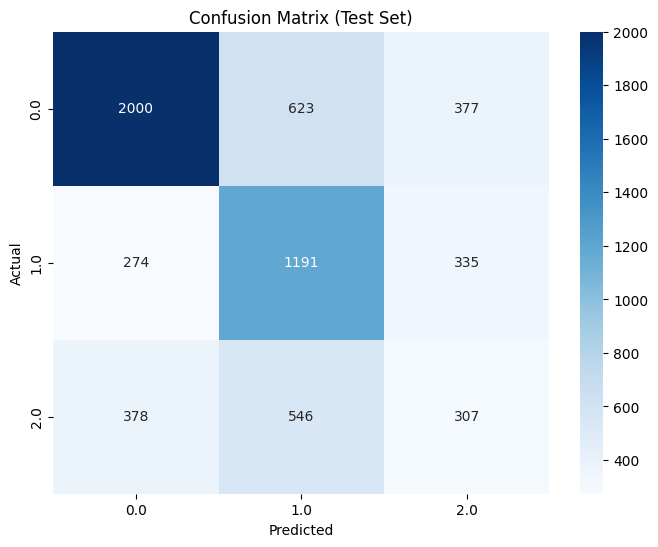

In [41]:
# Predictions on test set using the best parameters model
y_test_pred = best_rf.predict(X_test)

# Evaluation 
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix 
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()


### Improvement with respect to the Original Random Forest
- **ACCURACY:** the original model has higher accuracy (0.60 vs 0.58) which is driven by its better performance on the majority class.
- **BALANCENESS**: The optimized model `performs better on the minority class` with a *notable improvement in recall and F1 score*. However, this comes at the cost of a *slight decline in precision* for class 0 and 1
- **BIAS** The original model is more baised toward the majority class (NO guild) achieving higher recall but neglecting the minority class (Apprentice_Guild)
**CONCLUSION**: While the optimized model sacrifices some performance on Class 0, it achieves a `more balanced performance across all classes` (higher macro and weighted averages).

## Hyperparameter Tuning for Logistic Regression

We searched for the best parameter of: 
- `C (Regulariztion strength)`: it helps the model in avoiding overfitting. Smaller values specify stronger regularization. High regularization, helps prevent overfitting

- `Solver`: it is the optimization algorithm we are going to use in our model

- `Max_iter`: is the maximum number of iteration that solver has to converge to a solution 

- `Multi_class`: for this class we try only multinomial since we are working with a target value that is not binary but has 3 classes 

- `Class_weight`: is the weight given to each class. We try only balanced parameter since we want to maximize balancing in our unbalanced dataset


In [42]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['saga', 'lbfgs'],   # Solvers 
    'max_iter': [100, 500, 1000],  # Number of iterations
    'multi_class': ['multinomial'],  # Ensure multinomial regression
    'class_weight': ['balanced']    # Class balancing
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, 
                           param_grid=param_grid, 
                           scoring='accuracy',  
                           cv=5,  # 5-fold cross-validation
                           verbose=3,  # Verbose output
                           n_jobs=-1)  # Parallelize the search

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)

# Evaluate on validation set
best_LR = grid_search.best_estimator_
y_val_pred = best_LR.predict(X_val)

# Calculate and print accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Set Accuracy: {accuracy:.2f}")

# Print classification report
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'saga'}
Validation Set Accuracy: 0.58
Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.69      0.72      2100
         1.0       0.51      0.58      0.55      1260
         2.0       0.29      0.28      0.28       862

    accuracy                           0.58      4222
   macro avg       0.52      0.52      0.52      4222
weighted avg       0.58      0.58      0.58      4222



C:\Users\stefa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\stefa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Best Linear Regression model on test set 

Test Set Accuracy: 0.57
Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70      3000
         1.0       0.52      0.59      0.56      1800
         2.0       0.28      0.29      0.29      1231

    accuracy                           0.57      6031
   macro avg       0.52      0.52      0.52      6031
weighted avg       0.58      0.57      0.58      6031



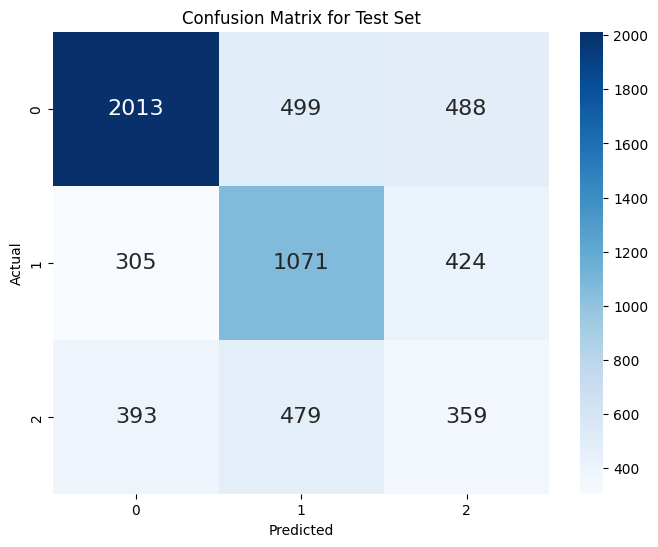

Test Set Macro-Averaged ROC AUC: 0.73
Test Set Weighted-Averaged ROC AUC: 0.76


In [43]:
# Use the best model found from grid search to predict on the test set
best_LR = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_LR.predict(X_test)

# Calculate and print accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

# Print classification report for the test set
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))


confusion = confusion_matrix(y_test, y_test_pred)


# plot the confusion matrix 

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set')
plt.show()


y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  
y_test_prob = best_LR.predict_proba(X_test)

# Calculate macro-averaged and weighted-averaged AUC for the test set
macro_roc_auc_test = roc_auc_score(y_test_binarized, y_test_prob, multi_class="ovr", average="macro")
weighted_roc_auc_test = roc_auc_score(y_test_binarized, y_test_prob, multi_class="ovr", average="weighted")

print(f"Test Set Macro-Averaged ROC AUC: {macro_roc_auc_test:.2f}")
print(f"Test Set Weighted-Averaged ROC AUC: {weighted_roc_auc_test:.2f}")


### Original vs Optimised Logistic Regression model Comparison

- **ACCURACY:** The original model achieves slightly better accuracy (3% higher) than the optimized model. This suggests that hyperparameter tuning did not result in improved overall accuracy and may have slightly decreased performance on the majority class.
- **IMPROVED APPRENTICE_GUILD DETECTION:** The optimized model improves a lot recall and F1-score for Class 2.
- **BALANCED PERFORMANCE ACROSS CLASSES:** The optimized model shows better macro-average metrics, highlighting improved balance across all classes.

### COMPARISONS BEETWEEN RANDOM FOREST AND LOGISTIC REGGRESSION
 We see that performances are very similar between the two methods and the best one depends on the problem we are looking at. If we prefer identifying class 0 and 2 meaning we prefer a higher recall for those classes we might use Logistic Regression while if we prefer an higher precision on classes 0 and 2 (avoiding false positives) we might go for Random Forest

## Models test on the full dataset 
After training and testing our models we decide to try them on the full dataset

### Start by using KNN imputer on the full dataset 
we use only the 3 nearest neighbors because otherwise it would take too long 

In [44]:
# Select numerical cols
numerical_cols = final_df.select_dtypes(include=['float64', 'int64']).columns

# Initialize KNN
knn_imputer = KNNImputer(n_neighbors=3)  

# Use KNN on numerical cols
final_df.loc[:, numerical_cols] = knn_imputer.fit_transform(final_df[numerical_cols])


Use the already trained model on the full dataset.

We do not have to do the splitting here because we already did the training of our models with the smaller sample dataset so we just used the trained and tuned model.

In [45]:
X_large = final_df.drop(columns=["Guild_Membership"])  
y_large = final_df["Guild_Membership"]  


Make predictions on the whole dataset using our trained and tuned models 

#### Random Forest

Total df Accuracy: 0.66

Total df classification report:
              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77     77634
         1.0       0.50      0.67      0.57     25766
         2.0       0.10      0.38      0.16      4102

    accuracy                           0.66    107502
   macro avg       0.50      0.57      0.50    107502
weighted avg       0.78      0.66      0.70    107502



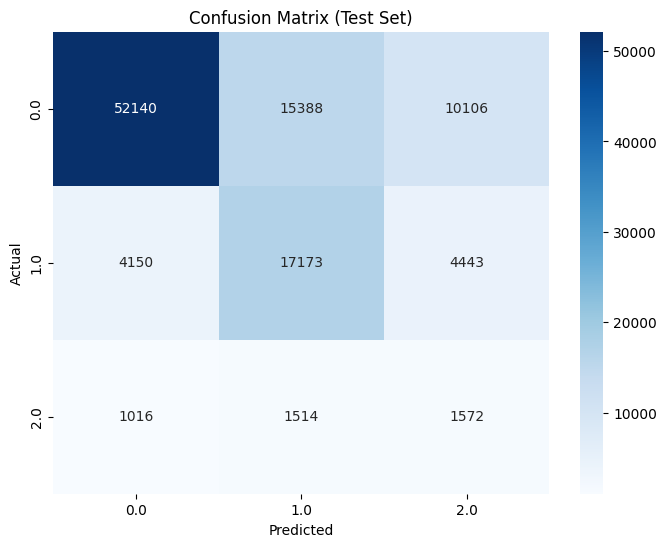

In [46]:
# Predictions on the full dataset
y_test_pred_large = best_rf.predict(X_large)

# Evaluation 
test_accuracy_large = accuracy_score(y_large, y_test_pred_large)
print(f"Total df Accuracy: {test_accuracy_large:.2f}")

print("\nTotal df classification report:")
print(classification_report(y_large, y_test_pred_large))

# Confusion Matrix 
conf_matrix_test_large = confusion_matrix(y_large, y_test_pred_large)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_large, annot=True, fmt="d", cmap="Blues", xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()


#### Logistic Regression 

Total df Accuracy: 0.64
Total df Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.67      0.77     77634
         1.0       0.51      0.59      0.55     25766
         2.0       0.06      0.30      0.10      4102

    accuracy                           0.64    107502
   macro avg       0.49      0.52      0.47    107502
weighted avg       0.77      0.64      0.69    107502



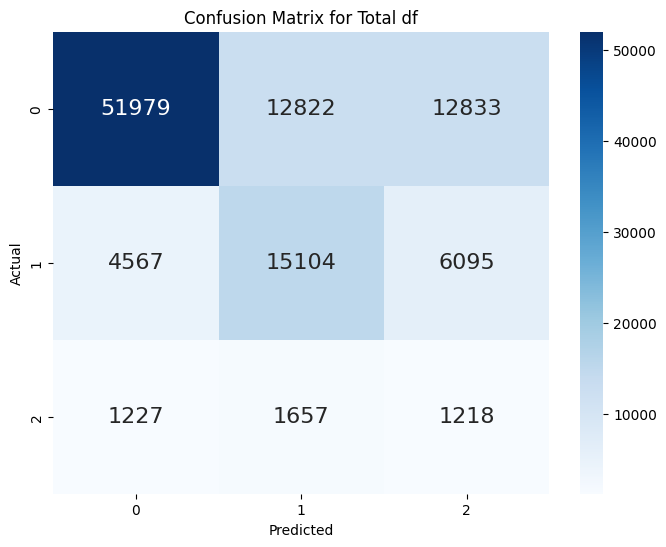

Total df Macro-Averaged ROC AUC: 0.77
Total df Weighted-Averaged ROC AUC: 0.81


In [47]:
best_LR = grid_search.best_estimator_

y_test_pred_large = best_LR.predict(X_large)

# Evaluation
test_accuracy_large = accuracy_score(y_large, y_test_pred_large)
print(f"Total df Accuracy: {test_accuracy_large:.2f}")

print("Total df Classification Report:")
print(classification_report(y_large, y_test_pred_large))


confusion_large = confusion_matrix(y_large, y_test_pred_large)


# plot the confusion matrix 

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_large, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Total df')
plt.show()


y_test_binarized_large = label_binarize(y_large, classes=[0, 1, 2])  
y_test_prob_large = best_LR.predict_proba(X_large)

# Calculate macro-averaged and weighted-averaged AUC for the test set
macro_roc_auc_test_large = roc_auc_score(y_test_binarized_large, y_test_prob_large, multi_class="ovr", average="macro")
weighted_roc_auc_test_large = roc_auc_score(y_test_binarized_large, y_test_prob_large, multi_class="ovr", average="weighted")

print(f"Total df Macro-Averaged ROC AUC: {macro_roc_auc_test_large:.2f}")
print(f"Total df Weighted-Averaged ROC AUC: {weighted_roc_auc_test_large:.2f}")


# Conclusion
After looking at the results, we can observe that overall Random Forest works better on the whole dataset. This means that for this task our reccomendation is Random Forest!